# Result processing for master thesis

We want to test 2 things:

- Q1: Can we predict the flipping of a condition:
Can we predict based on a set of metrics IF we will flip a branch (classification in flip or no flip)

- Q2: Is there a strategy which performs better than other strategies:
Can we predict based on a set of metrics WHICH strategy we can use to optimize the time spend on the branch. (regression analysis based on time between strategies)

## Importing data

In [426]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

STRATEGIES = ['GradientDescentStrategy', 'MagicByteStrategy' , 'OneByteStrategy', 'LengthTaintStrategy', 'ConcolicStrategy', 'RandomStrategy', 'RandomTaintStrategy']
VARIABLES_TO_TEST = ['oviedo', 'cyclomatic' , 'nrOfOffsets', 'cases', 'chain_size', 'depth2', 'trace_length']
PROGRAMS = ["gif2png", 
"file", "nm", "djpeg", "jhead", "xmlwf", "tcpdump"
]

all_data = []
for program in PROGRAMS:
    print("Reading " + "../results/%s/raw_data.csv" % program)
    program_data = pd.read_csv("../results/%s/raw_data.csv" % program, index_col=False, dtype={"program" : "category", "status": "category", "Strategy": "category", "totalTime": "float", 'comment': 'category'})
    program_data["program"] = program
    all_data.append(program_data)
data = pd.concat(all_data)
#set right types

def rename_status(df_row):
    if df_row["nrOfInputs"] == 0:
        return "Never tried"
    if df_row["nrOfInputs"] == df_row["nrOfMisses"]:
        return "Unreachable"
    if df_row["status"] == "MAXIMUM_EXECUTION_TIME_REACHED":
        return 'Never flipped'
    if df_row["status"] == "NOT_FLIPPED":
        return 'Never flipped'
    return df_row["status"]
data = data.reset_index(drop=True)
data.loc[:,"status"] = data.apply(rename_status,axis=1)
data["program"] = data["program"].astype('category')
data["status"] = data["status"].astype('category')
data["Strategy"] = data["Strategy"].astype('category')
data["comment"] = data["comment"].astype('category')
#add new column
data["relative_depth"] = data["depth2"]/data["trace_length"]
print("done")
data.info()

Reading ../results/gif2png/raw_data.csv
Reading ../results/file/raw_data.csv
Reading ../results/nm/raw_data.csv
Reading ../results/djpeg/raw_data.csv
Reading ../results/jhead/raw_data.csv
Reading ../results/xmlwf/raw_data.csv
Reading ../results/tcpdump/raw_data.csv
done
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373030 entries, 0 to 373029
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Strategy        373030 non-null  category
 1   id              373030 non-null  object  
 2   cmpid           373030 non-null  int64   
 3   nrOfMisses      373030 non-null  int64   
 4   nrOfInputs      373030 non-null  int64   
 5   depth           373030 non-null  int64   
 6   status          373030 non-null  category
 7   totalTime       373030 non-null  float64 
 8   nrOfOffsets     373030 non-null  int64   
 9   cyclomatic      373030 non-null  object  
 10  oviedo          373030 non-null  object  
 11  ch

In [427]:
data.groupby(["program"]).describe()

cmpid                                                         \
            count          mean           std          min           25%   
program                                                                    
djpeg      3577.0  2.166134e+09  7.874457e+08  611337383.0  1.903821e+09   
file      29778.0  2.604965e+09  1.111522e+09   38470707.0  1.750991e+09   
gif2png    3997.0  2.830103e+08  6.156256e+08   98897100.0  9.891462e+07   
jhead      7343.0  3.154597e+09  6.339629e+08  610160718.0  3.307622e+09   
nm       140091.0  1.737491e+09  7.747063e+08   63528831.0  1.452850e+09   
tcpdump  110446.0  1.930196e+09  1.023299e+09    1371024.0  1.282170e+09   
xmlwf     77798.0  2.246646e+09  1.092970e+09   47579087.0  1.229512e+09   

                                                  nrOfMisses              ...  \
                  50%           75%           max      count        mean  ...   
program                                                                   ...   
djpeg    1.903842e+09  1.903878e+09  4.249747e+09     3577.0  202.668158  ...   
file     3.219363e+09  3.491157e+09  4.269747e+09    29778.0  579.301531  ...   
gif2png  9.892838e+07  9.896003e+07  3.422579e+09     3997.0  421.534651  ...   
jhead    3.307644e+09  3.307668e+09  4.243289e+09     7343.0  209.916928  ...   
nm       1.693393e+09  2.355263e+09  4.223215e+09   140091.0  454.546823  ...   
tcpdump  1.859036e+09  2.541072e+09  4.288922e+09   110446.0  407.708373  ...   
xmlwf    2.511150e+09  3.238476e+09  4.130884e+09    77798.0  569.972429  ...   

        combined      relative_depth                                     \
             75%  max          count      mean       std  min       25%   
program                                                                   
djpeg        5.0  5.0         3577.0  0.848772  0.147670  0.0  0.740196   
file         5.0  5.0        29778.0  0.488131  0.308479  0.0  0.239331   
gif2png      5.0  5.0         3997.0  0.773417  0.254703  0.0  0.600000   
jhead        5.0  5.0         7343.0  0.550608  0.274634  0.0  0.327062   
nm           5.0  5.0       140091.0  0.699881  0.233462  0.0  0.512786   
tcpdump      5.0  5.0       110446.0  0.548443  0.331042  0.0  0.312233   
xmlwf        5.0  5.0        77798.0  0.845426  0.195588  0.0  0.826955   

                                       
              50%       75%       max  
program                                
djpeg    0.916084  0.958333  0.995434  
file     0.366145  0.803448  0.999532  
gif2png  0.914980  0.972789  0.998175  
jhead    0.538217  0.842105  0.995961  
nm       0.731288  0.919448  0.999743  
tcpdump  0.407867  0.949219  0.999929  
xmlwf    0.888252  0.982625  0.999890  

[7 rows x 96 columns]

In [428]:
OUTPUT_FOLDER='../results/graphs_new/'

In [429]:
data.groupby(["Strategy"]).describe()

cmpid                                         \
                           count          mean           std        min   
Strategy                                                                  
ConcolicStrategy         53290.0  1.986404e+09  1.014027e+09  1371024.0   
GradientDescentStrategy  53290.0  1.986404e+09  1.014027e+09  1371024.0   
LengthTaintStrategy      53290.0  1.986404e+09  1.014027e+09  1371024.0   
MagicByteStrategy        53290.0  1.986404e+09  1.014027e+09  1371024.0   
OneByteStrategy          53290.0  1.986404e+09  1.014027e+09  1371024.0   
RandomStrategy           53290.0  1.986404e+09  1.014027e+09  1371024.0   
RandomTaintStrategy      53290.0  1.986404e+09  1.014027e+09  1371024.0   

                                                                   \
                                  25%           50%           75%   
Strategy                                                            
ConcolicStrategy         1.423286e+09  1.693448e+09  2.785121e+09   
GradientDescentStrategy  1.423286e+09  1.693448e+09  2.785121e+09   
LengthTaintStrategy      1.423286e+09  1.693448e+09  2.785121e+09   
MagicByteStrategy        1.423286e+09  1.693448e+09  2.785121e+09   
OneByteStrategy          1.423286e+09  1.693448e+09  2.785121e+09   
RandomStrategy           1.423286e+09  1.693448e+09  2.785121e+09   
RandomTaintStrategy      1.423286e+09  1.693448e+09  2.785121e+09   

                                      nrOfMisses               ... combined  \
                                  max      count         mean  ...      75%   
Strategy                                                       ...            
ConcolicStrategy         4.288922e+09    53290.0     8.790730  ...      1.0   
GradientDescentStrategy  4.288922e+09    53290.0   540.227735  ...      5.0   
LengthTaintStrategy      4.288922e+09    53290.0     0.111409  ...      1.0   
MagicByteStrategy        4.288922e+09    53290.0     7.859917  ...      1.0   
OneByteStrategy          4.288922e+09    53290.0     6.966035  ...      1.0   
RandomStrategy           4.288922e+09    53290.0  1498.602289  ...      5.0   
RandomTaintStrategy      4.288922e+09    53290.0  1207.325014  ...      5.0   

                             relative_depth                           \
                         max          count      mean       std  min   
Strategy                                                               
ConcolicStrategy         1.0        53290.0  0.667772  0.292139  0.0   
GradientDescentStrategy  5.0        53290.0  0.667772  0.292139  0.0   
LengthTaintStrategy      1.0        53290.0  0.667772  0.292139  0.0   
MagicByteStrategy        1.0        53290.0  0.667772  0.292139  0.0   
OneByteStrategy          1.0        53290.0  0.667772  0.292139  0.0   
RandomStrategy           5.0        53290.0  0.667772  0.292139  0.0   
RandomTaintStrategy      5.0        53290.0  0.667772  0.292139  0.0   

                                                                
                              25%      50%       75%       max  
Strategy                                                        
ConcolicStrategy         0.403207  0.76077  0.938885  0.999929  
GradientDescentStrategy  0.403207  0.76077  0.938885  0.999929  
LengthTaintStrategy      0.403207  0.76077  0.938885  0.999929  
MagicByteStrategy        0.403207  0.76077  0.938885  0.999929  
OneByteStrategy          0.403207  0.76077  0.938885  0.999929  
RandomStrategy           0.403207  0.76077  0.938885  0.999929  
RandomTaintStrategy      0.403207  0.76077  0.938885  0.999929  

[7 rows x 96 columns]

In [430]:
data.groupby(["Strategy"])['totalTime'].describe()

,count,mean,std,min,25%,50%,75%,max
Strategy,,,,,,,,
ConcolicStrategy,53290.0,1.844047,3.995088,0.013107,0.047717,0.124807,0.984908,17.634102
GradientDescentStrategy,53290.0,5.844458,7.210158,0.000017,0.006888,0.146661,15.003620,15.359302
LengthTaintStrategy,53290.0,0.002806,0.011339,0.000014,0.000047,0.000057,0.000070,0.344159
MagicByteStrategy,53290.0,0.216230,0.458546,0.000012,0.012838,0.120636,0.339555,15.425827
OneByteStrategy,53290.0,0.140491,0.888431,0.000013,0.000051,0.000062,0.000089,9.685037
RandomStrategy,53290.0,12.017820,5.290799,0.002082,11.768609,15.001371,15.017252,15.493954
RandomTaintStrategy,53290.0,8.719053,7.275973,0.000021,0.008326,15.000751,15.012886,15.692591


## Inspect data

We will look at the number of flips per strategy per binary

<ipython-input-431-6f83db12a611>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.Strategy.cat.categories, rotation = 90)


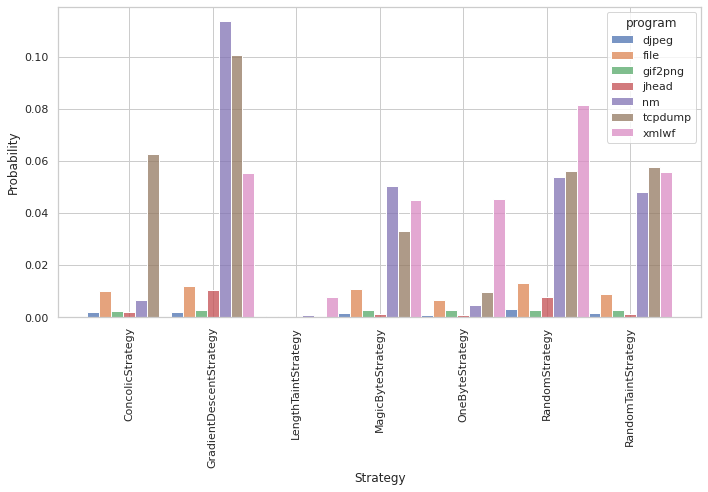

In [431]:

df = data
programs = df.program.unique()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize =(10, df["Strategy"].unique().size))
ax = sns.histplot(x="Strategy", data=df[  (df["flipped"] == 1)], hue="program", stat="probability", multiple="dodge",  ax=ax)
ax.set_xticklabels(df.Strategy.cat.categories, rotation = 90)
plt.tight_layout()

### Substrategy plot

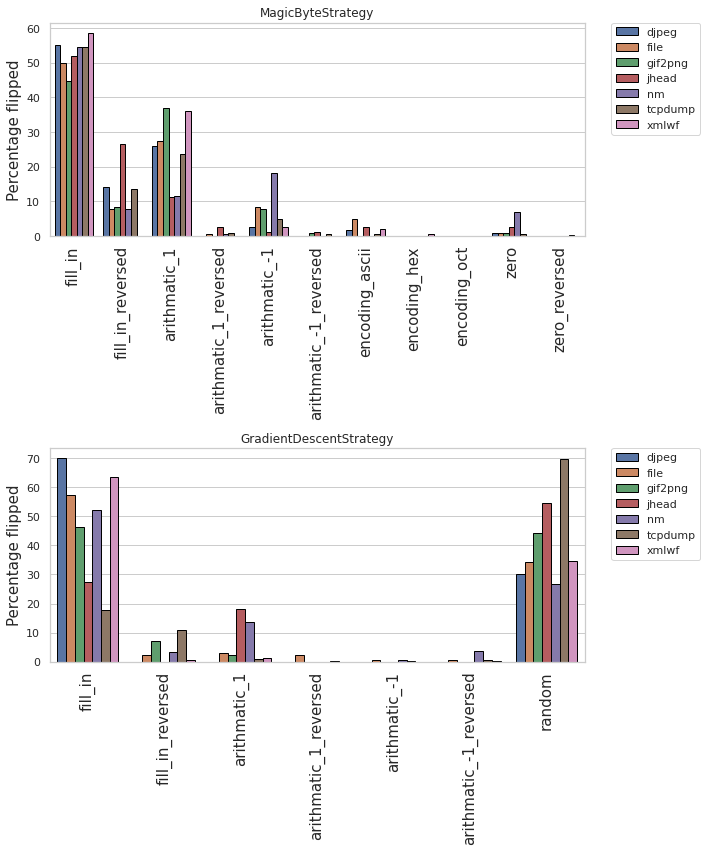

In [451]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize =(10, 12))
df_substrategy = df.copy()
x, y, hue = "comment", "flipped", "program"
substrategies = ['fill_in_False', 'fill_in_True', 'arithmatic_1_False', 'arithmatic_1_True', 'arithmatic_-1_False', 'arithmatic_-1_True', 'encoding_ascii_False', 'encoding_ascii_True', 'encoding_hex_False', 'encoding_hex_True', 'encoding_oct_False', 'encoding_oct_True', 'zero_False', 'zero_True', 'random']
df_substrategy.loc[:,"comment"] = df_substrategy["comment"].apply(lambda x: x.replace("_1_0","_1_False").replace("_-1_0", "_-1_False").replace("_1_1","_1_True").replace("_-1_1", "_-1_True").replace("_in_0", "_in_False").replace("_in_1", "_in_True").replace("_True", "_reversed").replace("_False",""))
df_substrategy["comment"] = df_substrategy["comment"].astype('category')
substrategies = [s.replace("_False","").replace("_True","_reversed") for s in substrategies]
df_substrategy.comment = df_substrategy.comment.cat.set_categories(substrategies, ordered=True)
for s, ax in zip(['MagicByteStrategy', 'GradientDescentStrategy'], axs):
    df_sub = df_substrategy[(df_substrategy['comment'].isin(substrategies)) & (df_substrategy['Strategy'] == s) & (df_substrategy['flipped'] == 1)].copy()
    df_sub.comment = df_sub.comment.cat.remove_unused_categories()
    ax = (df_sub[x]
     .groupby(df_sub[hue])
     .value_counts(normalize=True)
     .mul(100)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, ax=ax, edgecolor=(0,0,0)))
    ax.set_xticklabels(df_sub.comment.cat.categories, rotation = 90, fontsize=15)
    ax.set(ylabel='Percentage flipped', xlabel=None, title=s)
    ax.set_ylabel('Percentage flipped', fontsize=15)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
fig.savefig(OUTPUT_FOLDER+'substrategy_overview.png')    

## Percentage plot

,gif2png,file,nm,djpeg,jhead,xmlwf,tcpdump
GradientDescentStrategy,40.455342,22.802069,45.590366,28.571429,78.360343,40.039590,51.337305
ConcolicStrategy,35.376532,19.040903,2.573327,29.745597,14.204004,0.000000,31.873495
LengthTaintStrategy,1.401051,0.940291,0.249838,8.414873,0.000000,5.704517,0.050704
MagicByteStrategy,35.551664,20.216267,20.261830,23.483366,7.530982,32.409574,16.833566
OneByteStrategy,35.551664,12.106253,1.838805,10.958904,6.005720,32.823466,4.854861
RandomTaintStrategy,39.929947,16.502116,19.272473,23.091977,9.818875,40.237538,29.357333
RandomStrategy,38.353765,24.659144,21.665917,51.467710,58.150620,58.934677,28.647484
RandomStrategy with taint,27.320490,16.596145,20.251836,20.743640,57.959962,35.297823,28.533401


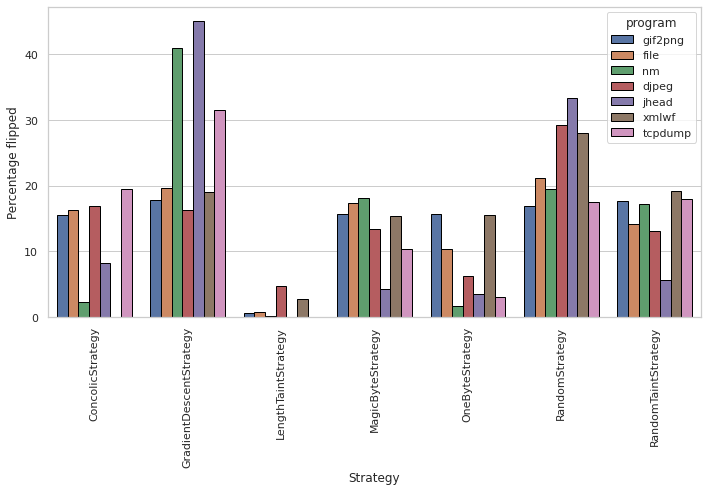

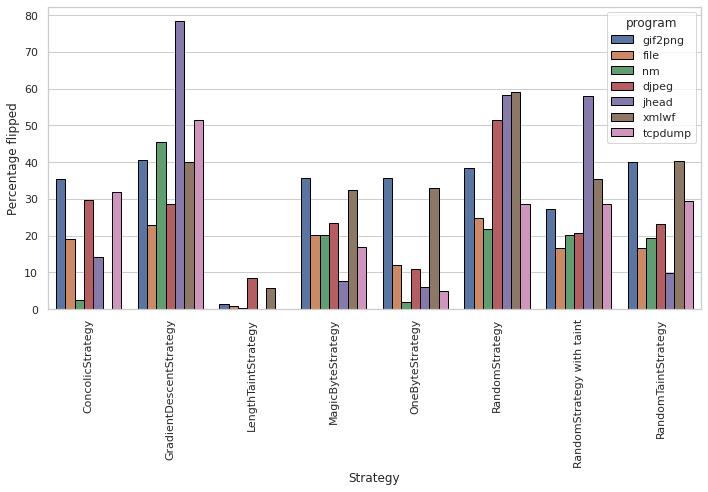

In [459]:
x,y, hue = 'Strategy', 'flipped', 'program'
df_test = df.copy()
df_test = df_test[df_test['flipped'] == 1]
x, y, hue = "Strategy", "flipped", "program"
sns.set_theme(style="whitegrid", palette='deep')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize =(10, df["Strategy"].unique().size))
ax = (df_test[x]
 .groupby(df_test[hue])
 .value_counts(normalize=True)
 .mul(100)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, ax=ax, edgecolor=(0,0,0), hue_order=programs))
ax.set_xticklabels(df.Strategy.cat.categories, rotation = 90)
ax.set(ylabel='Percentage flipped')
plt.tight_layout()
fig.savefig(OUTPUT_FOLDER+'percentage_flipped_relative.png')
df_tmp = df.copy()
percentage_results = []
modified_strategies = list(strategies)
modified_strategies.append(modified_strategies.pop(modified_strategies.index('RandomStrategy')))
modified_strategies = modified_strategies + ['RandomStrategy with taint']
for p in programs:
    for s in modified_strategies:
        if s == 'RandomStrategy with taint':
            flipped_conditions = df_tmp[(df_tmp["Strategy"] == 'RandomStrategy') & (df_tmp["program"] == p) & (df_tmp["flipped"] == 1) & (df_tmp["nrOfOffsets"] > 0)].size
            total_conditions = df_tmp[(df_tmp["Strategy"] == 'RandomStrategy') &(df_tmp["program"] == p)].size
        else:
            flipped_conditions = df_tmp[(df_tmp["Strategy"] == s) & (df_tmp["program"] == p) & (df_tmp["flipped"] == 1)].size
            total_conditions = df_tmp[(df_tmp["Strategy"] == s) &(df_tmp["program"] == p)].size
        percentage_results.append({'Strategy': s, 'program': p, 'flipped': flipped_conditions/total_conditions*100})
df_percentage_results = pd.DataFrame(percentage_results)
df_percentage_results["Strategy"] = df_percentage_results["Strategy"].astype('category')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize =(10, df["Strategy"].unique().size))
df_percentage_results.pipe((sns.barplot, "data"), x=x, y=y, hue=hue, ax=ax, edgecolor=(0,0,0), order=df_percentage_results.Strategy.cat.categories, hue_order=programs)
ax.set_xticklabels(df_percentage_results.Strategy.cat.categories, rotation = 90)
ax.set(ylabel='Percentage flipped')
plt.tight_layout()
fig.savefig(OUTPUT_FOLDER+'percentage_flipped_total.png')
table_df = {}
for p in programs:
    column = {}
    for s in modified_strategies:
        column[s] = df_percentage_results[(df_percentage_results['Strategy'] == s) & (df_percentage_results['program'] == p)]['flipped'].iloc[0]
    table_df[p] = column
pd.DataFrame(table_df)
        

In [375]:
df_percentage_results[y].groupby([df_percentage_results[hue], df_percentage_results[x]]).sum().rename(y)
df_test[x].groupby(df_test[hue]).value_counts(normalize=True).mul(100).rename(y).reset_index()

,program,Strategy,flipped
0,djpeg,RandomStrategy,29.287305
1,djpeg,ConcolicStrategy,16.926503
2,djpeg,GradientDescentStrategy,16.258352
3,djpeg,MagicByteStrategy,13.363029
4,djpeg,RandomTaintStrategy,13.140312
5,djpeg,OneByteStrategy,6.236080
6,djpeg,LengthTaintStrategy,4.788419
7,file,RandomStrategy,21.209058
8,file,GradientDescentStrategy,19.611808
9,file,MagicByteStrategy,17.387788


### Micro-benchmarks

,ConcolicStrategy,GradientDescentStrategy,LengthTaintStrategy,MagicByteStrategy,OneByteStrategy,RandomStrategy,RandomTaintStrategy
Never flipped,24.771176,51.525953,6.538176,12.542251,2.173229,92.01522,17.807316
Never tried,59.384489,32.620430,92.473385,23.034880,96.664639,0.00000,24.374715
Unreachable,15.844335,15.853617,0.988440,64.422869,1.162132,7.98478,57.817970


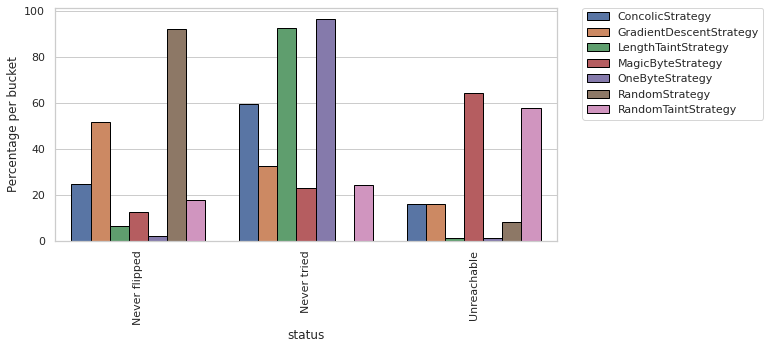

In [470]:
x,y, hue = 'status', 'program', 'Strategy'
df_test = df.copy()
df_test = df_test[df_test["status"] != "FLIPPED_CONDITION"]
df_test.status = df_test.status.cat.remove_unused_categories()
sns.set_theme(style="whitegrid", palette='deep')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize =(8, 5))
df_not_flipped_per_bucket = (df_test[x]
 .groupby(df_test[hue])
 .value_counts(normalize=True)
 .mul(100)
 .rename(y)
 .reset_index())
ax =  df_not_flipped_per_bucket.pipe((sns.barplot, "data"), x=x, y=y, hue=hue, ax=ax, edgecolor=(0,0,0))
ax.set_xticklabels(df_test.status.cat.categories, rotation = 90)
ax.set(ylabel='Percentage per bucket')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig(OUTPUT_FOLDER+'benchmarks.png', bbox_inches='tight')
table_df = {}
for s in df_not_flipped_per_bucket.Strategy.cat.categories:
    column = {}
    for status in df_not_flipped_per_bucket.status.cat.categories:
        column[status] = df_not_flipped_per_bucket[(df_not_flipped_per_bucket['Strategy'] == s) & (df_not_flipped_per_bucket['status'] == status)]['program']
        if len(column[status]) > 0:
            column[status] = column[status].iloc[0]
        else:
            column[status] = 0
    table_df[s] = column
pd.DataFrame(table_df)

### Filter values
We will filter the values of - from the data

In [377]:
columns = ['relative_depth', 'program', 'flipped', 'id','cmpid', 'Strategy', 'reachableness', 'totalTime']
columns += VARIABLES_TO_TEST
df_copy = df[columns].copy()
for column in columns:
    df_copy = df_copy[df_copy[column] != '-']
programs = df_copy.program.unique()
for variable in ['oviedo', 'cyclomatic', 'cases', 'chain_size']:
    df_copy[variable] = df_copy[variable].astype('int')
var_names = columns.copy()
var_names.remove("program")
var_names.remove("id")
var_names.remove("Strategy")
var_names.remove('trace_length')
df_copy['depth'] = df_copy['depth2']
var_names.append('depth')
var_names.remove('depth2')
df_copy = df_copy.drop('depth2', axis=1)
df_copy = df_copy.drop('trace_length', axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316400 entries, 0 to 373029
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   relative_depth  316400 non-null  float64 
 1   program         316400 non-null  category
 2   flipped         316400 non-null  int64   
 3   id              316400 non-null  object  
 4   cmpid           316400 non-null  int64   
 5   Strategy        316400 non-null  category
 6   reachableness   316400 non-null  int64   
 7   totalTime       316400 non-null  float64 
 8   oviedo          316400 non-null  int64   
 9   cyclomatic      316400 non-null  int64   
 10  nrOfOffsets     316400 non-null  int64   
 11  cases           316400 non-null  int64   
 12  chain_size      316400 non-null  int64   
 13  depth           316400 non-null  int64   
dtypes: category(2), float64(2), int64(9), object(1)
memory usage: 32.0+ MB


In [378]:
df_copy.sort_values(["Strategy", "id"])
strategies = df_copy.Strategy.unique()
df_grouped = df_copy[df_copy["Strategy"] == strategies[0]].copy()
df_grouped = df_grouped.reset_index(drop=True)
#print(df_grouped.head(1))
#print(df_grouped.tail(1))
for strategy in strategies:
    df_temp = df_copy[df_copy["Strategy"] == strategy].copy().reset_index(drop=True)
    #print(df_temp.head(1))
    #print(df_temp.tail(1))
    df_grouped.flipped |= df_temp.flipped
print(df_grouped.head(8))

   relative_depth  program  flipped                       id     cmpid  \
0        0.716904  gif2png        0    98922675_790838_0_288  98922675   
1        0.983333  gif2png        1      98927229_35617_1_32  98927229   
2        0.983806  gif2png        1     98927229_168856_0_32  98927229   
3        0.923077  gif2png        1    98912808_145288_0_288  98912808   
4        0.949275  gif2png        1     98927229_357687_1_32  98927229   
5        0.978632  gif2png        1     98909640_289905_1_32  98909640   
6        0.976471  gif2png        1    98922675_193050_1_288  98922675   
7        0.995546  gif2png        1  98909640_168856_1_32771  98909640   

                  Strategy  reachableness  totalTime  oviedo  cyclomatic  \
0  GradientDescentStrategy            107  15.000632      85          10   
1  GradientDescentStrategy              1   0.080522      32           4   
2  GradientDescentStrategy              1   0.086801      32           4   
3  GradientDescentStrategy   

### Overlap between strategies

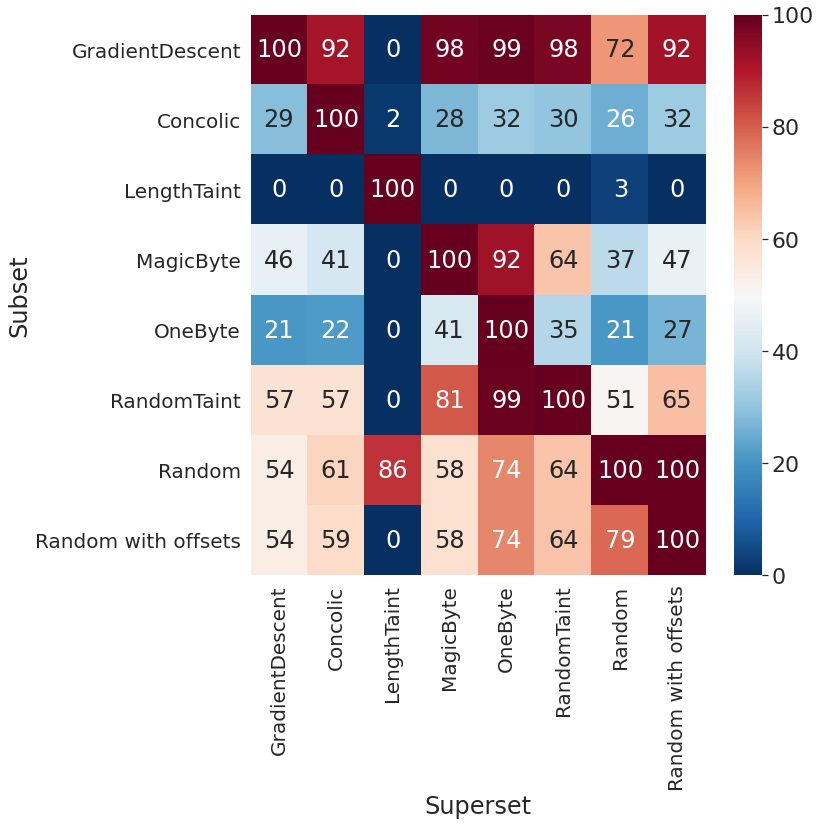

In [484]:
df_group_by_strategy = df_copy[(df_copy["flipped"] == 1)].groupby(["Strategy"])
overlap = {}
strategies_modified = list(strategies)
strategies_modified.append(strategies_modified.pop(strategies_modified.index('RandomStrategy'))) 
strategies_modified.append('RandomStrategyWithOffset')
for s1 in strategies_modified:
    overlap[s1] = {}
    if s1 == "RandomStrategyWithOffset":
        df_per_strategy1 = df_group_by_strategy.get_group("RandomStrategy")
        df_per_strategy1 = df_per_strategy1[df_per_strategy1["nrOfOffsets"] > 0]
    else:
        df_per_strategy1 = df_group_by_strategy.get_group(s1)
    ids_s1 = set(df_per_strategy1["id"])
    for s2 in strategies_modified:
        if s2 == "RandomStrategyWithOffset":
            df_per_strategy2 = df_group_by_strategy.get_group("RandomStrategy")
            df_per_strategy2 = df_per_strategy2[df_per_strategy2["nrOfOffsets"] > 0]
        else:
            df_per_strategy2 = df_group_by_strategy.get_group(s2)
        ids_s2 = set(df_per_strategy2["id"])
        total_ids = ids_s1#.union(ids_s2)
        overlap_ids = ids_s1.intersection(ids_s2)
        overlap[s1][s2] = len(overlap_ids)/len(total_ids)*100
overlap_results = pd.DataFrame(overlap)
fig, ax = plt.subplots(1,1, figsize=(12, 12))
sns.set(font_scale=2)
sns.heatmap(overlap_results,fmt=".0f", annot=True, ax=ax, cmap="RdBu_r", vmin=0, vmax=100)
ax.set_xticklabels([t.get_text().replace("Strategy","").replace("WithOffset", " with offsets") for t in ax.get_xticklabels()])
ax.set_yticklabels([t.get_text().replace("Strategy","").replace("WithOffset", " with offsets") for t in ax.get_yticklabels()])
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel("Superset")
plt.ylabel("Subset")
plt.tight_layout()
fig.savefig(OUTPUT_FOLDER+"overlap_strategies.png")

### Effectiveness of context awareness

In [89]:
df_group_by_program = df_grouped.copy().groupby(["program"])
flipped_positions = {}
for p in programs:
    flipped_positions[p] = {'flipped': 0, 'mixed': 0, 'not flipped': 0}
    program_group = df_group_by_program.get_group(p)
    cmpid_groups = program_group.groupby(["cmpid"])
    for cmpid, cmpid_group in cmpid_groups:
        cmpid_group_flipped = cmpid_group['flipped']
        flipped_positions[p]['flipped'] += cmpid_group_flipped.all()
        flipped_positions[p]['mixed'] += (not cmpid_group_flipped.all()) and cmpid_group_flipped.any()
        flipped_positions[p]['not flipped'] += not cmpid_group_flipped.any()
    print("Done with %s" % (p))

Done with gif2png
Done with file
Done with nm
Done with djpeg
Done with jhead
Done with xmlwf
Done with tcpdump


In [123]:
flipped_without_context = pd.DataFrame(flipped_positions).transpose()
flipped_without_context['total without context'] = flipped_without_context['flipped'] + flipped_without_context['not flipped'] + flipped_without_context['mixed']
flipped_without_context['total with context'] = [len(df_grouped[df_grouped['program'] == p]['id']) for p in programs]
flipped_without_context['flipped'] = flipped_without_context['flipped']/flipped_without_context['total without context']*100
flipped_without_context['mixed'] = flipped_without_context['mixed']/flipped_without_context['total without context']*100
flipped_without_context['not flipped'] = flipped_without_context['not flipped']/flipped_without_context['total without context']*100
flipped_without_context= flipped_without_context.round({'flipped': 2, 'mixed': 2, 'not flipped': 2})
flipped_without_context

,flipped,mixed,not flipped,total without context,total with context
gif2png,44.29,37.14,18.57,70,500
file,30.11,27.06,42.83,558,3956
nm,27.32,33.61,39.07,604,17113
djpeg,59.79,27.84,12.37,97,415
jhead,54.29,31.43,14.29,105,1017
xmlwf,47.18,41.55,11.27,621,8980
tcpdump,28.36,19.11,52.53,2214,13219


In [116]:
r = {}
for p in programs:
    df_data = df
    r[p] = {}
    r[p]['unique ids'] = df_data[df_data['program'] == p]['id'].unique().size
    r[p]['unique cmp ids'] = df_data[df_data['program'] == p]['cmpid'].unique().size
    df_data = df_grouped
    r[p]['unique ids 2'] = df_data[df_data['program'] == p]['id'].unique().size
    r[p]['unique cmp ids 2 '] = df_data[df_data['program'] == p]['cmpid'].unique().size
result = pd.DataFrame(r)
result

,gif2png,file,nm,djpeg,jhead,xmlwf,tcpdump
unique ids,571,4254,20013,511,1049,11114,15778
unique cmp ids,82,609,699,111,111,821,3022
unique ids 2,500,3956,17113,415,1017,8980,13219
unique cmp ids 2,70,558,604,97,105,621,2214


### Correlation

In [485]:
def rename_labels(labels):
    result = []
    for l in labels:
        text = l.get_text()
        if text == "depth":
            text = "absolute depth"
        text = text.replace("nrOfOffsets","offsets").replace("_", " ").replace("totalTime", 'total time').replace("Strategy","")
        result.append(text)
    return result

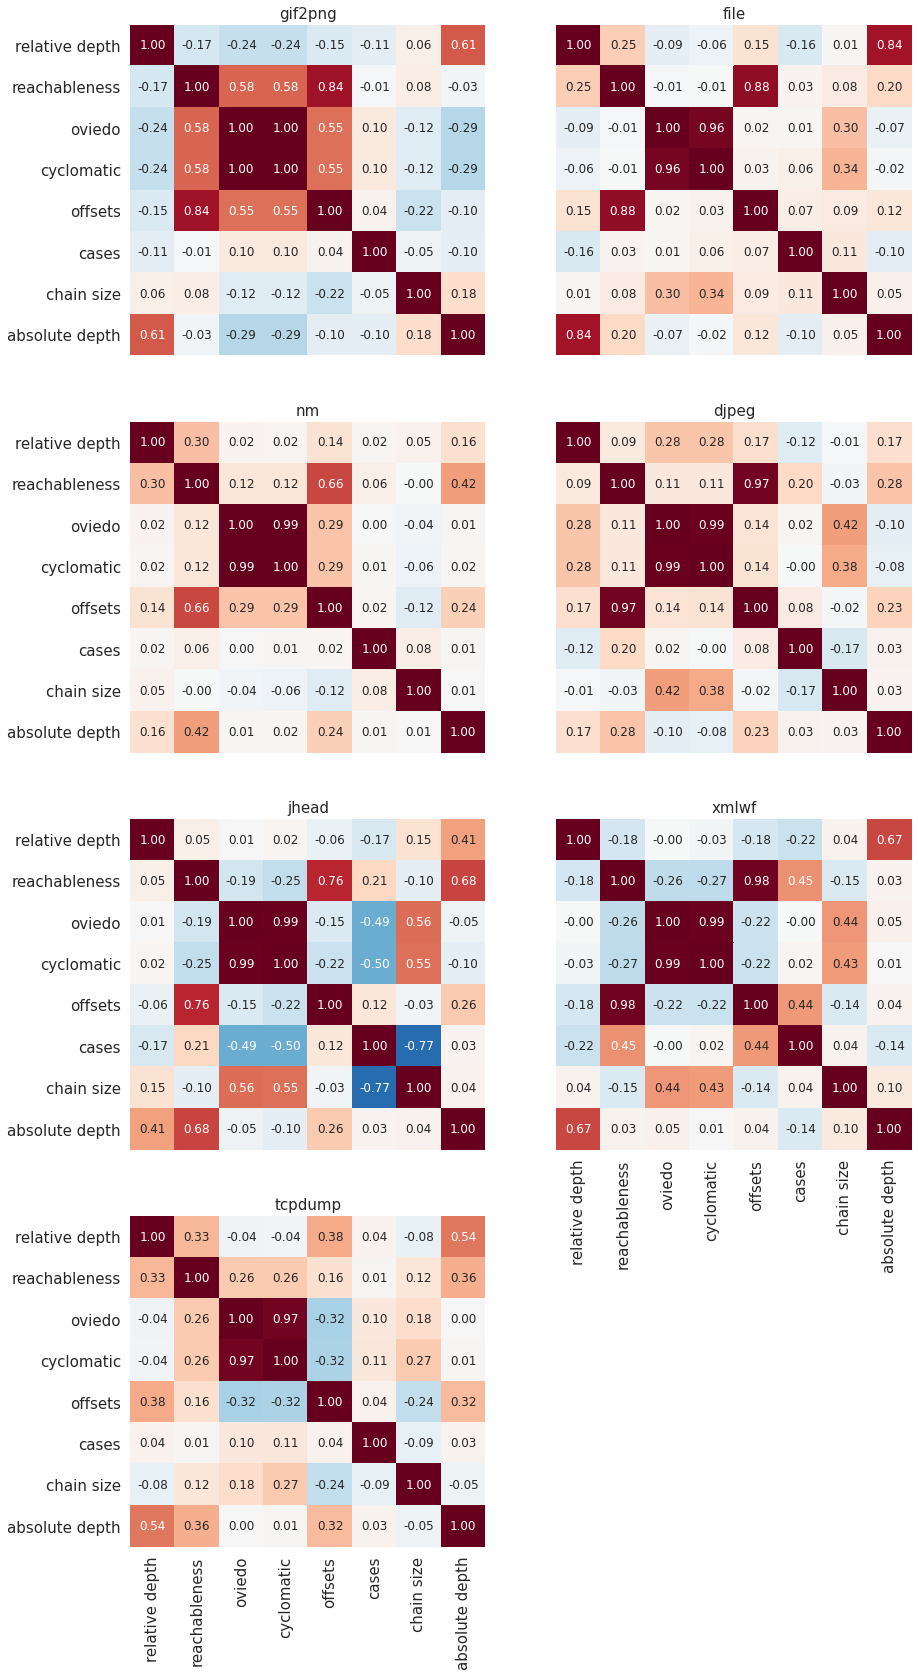

In [440]:
fig, axs = plt.subplots(4,2, figsize=(14, 28))
axs = axs.flatten().tolist()
ax_to_remove = axs.pop()
ax_to_remove.set_axis_off()
count = 0
df_grouped['cmpid'] = df_grouped['cmpid'].astype('object')
columns = list(df_grouped.columns)
columns.pop(columns.index('flipped'))
columns.pop(columns.index('totalTime'))
for ax, f in zip(axs, df_copy.program.unique()):
    ax.set_title(f, fontsize=15)
    cbar = False
    ax = sns.heatmap(df_grouped[df_grouped.program == f][columns].corr('spearman'),
                    fmt=".2f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1, cbar=cbar)
    ax.tick_params(labelsize=15)
    ax.set_xticklabels(rename_labels(ax.get_xticklabels()))
    ax.set_yticklabels(rename_labels(ax.get_yticklabels()))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if count %2 == 0:
        ax.get_yaxis().set_visible(True)
    if count == 5 or count == 6:
        ax.get_xaxis().set_visible(True)
    count += 1
fig.savefig(OUTPUT_FOLDER+'correlation_benchmarks.png')

We see a colinearity between the cyclomatic and oviedo variable.
Also between the depth2 and tracelength.

In [392]:
def rename_label(text):
    if text == "depth":
        text = "absolute depth"
    return text.replace("nrOfOffsets","offsets").replace("_", " ").replace("totalTime", 'total time')

### Check histogram of all flipped conditions

/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Plotted gif2png cases
Plotted gif2png relative_depth
Plotted gif2png oviedo
Plotted gif2png cyclomatic
Plotted gif2png nrOfOffsets
Plotted gif2png chain_size
Plotted gif2png depth
Plotted file cases
Plotted file relative_depth
Plotted file oviedo
Plotted file cyclomatic
Plotted file nrOfOffsets
Plotted file chain_size


/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Plotted file depth
Plotted nm cases
Plotted nm relative_depth
Plotted nm oviedo
Plotted nm cyclomatic
Plotted nm nrOfOffsets
Plotted nm chain_size
Plotted nm depth


/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Plotted djpeg cases
Plotted djpeg relative_depth
Plotted djpeg oviedo
Plotted djpeg cyclomatic
Plotted djpeg nrOfOffsets
Plotted djpeg chain_size
Plotted djpeg depth
Plotted jhead cases


/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Plotted jhead relative_depth
Plotted jhead oviedo
Plotted jhead cyclomatic
Plotted jhead nrOfOffsets
Plotted jhead chain_size
Plotted jhead depth
Plotted xmlwf cases


/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Plotted xmlwf relative_depth
Plotted xmlwf oviedo
Plotted xmlwf cyclomatic
Plotted xmlwf nrOfOffsets


/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Plotted xmlwf chain_size
Plotted xmlwf depth
Plotted tcpdump cases
Plotted tcpdump relative_depth
Plotted tcpdump oviedo
Plotted tcpdump cyclomatic


/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Plotted tcpdump nrOfOffsets
Plotted tcpdump chain_size
Plotted tcpdump depth


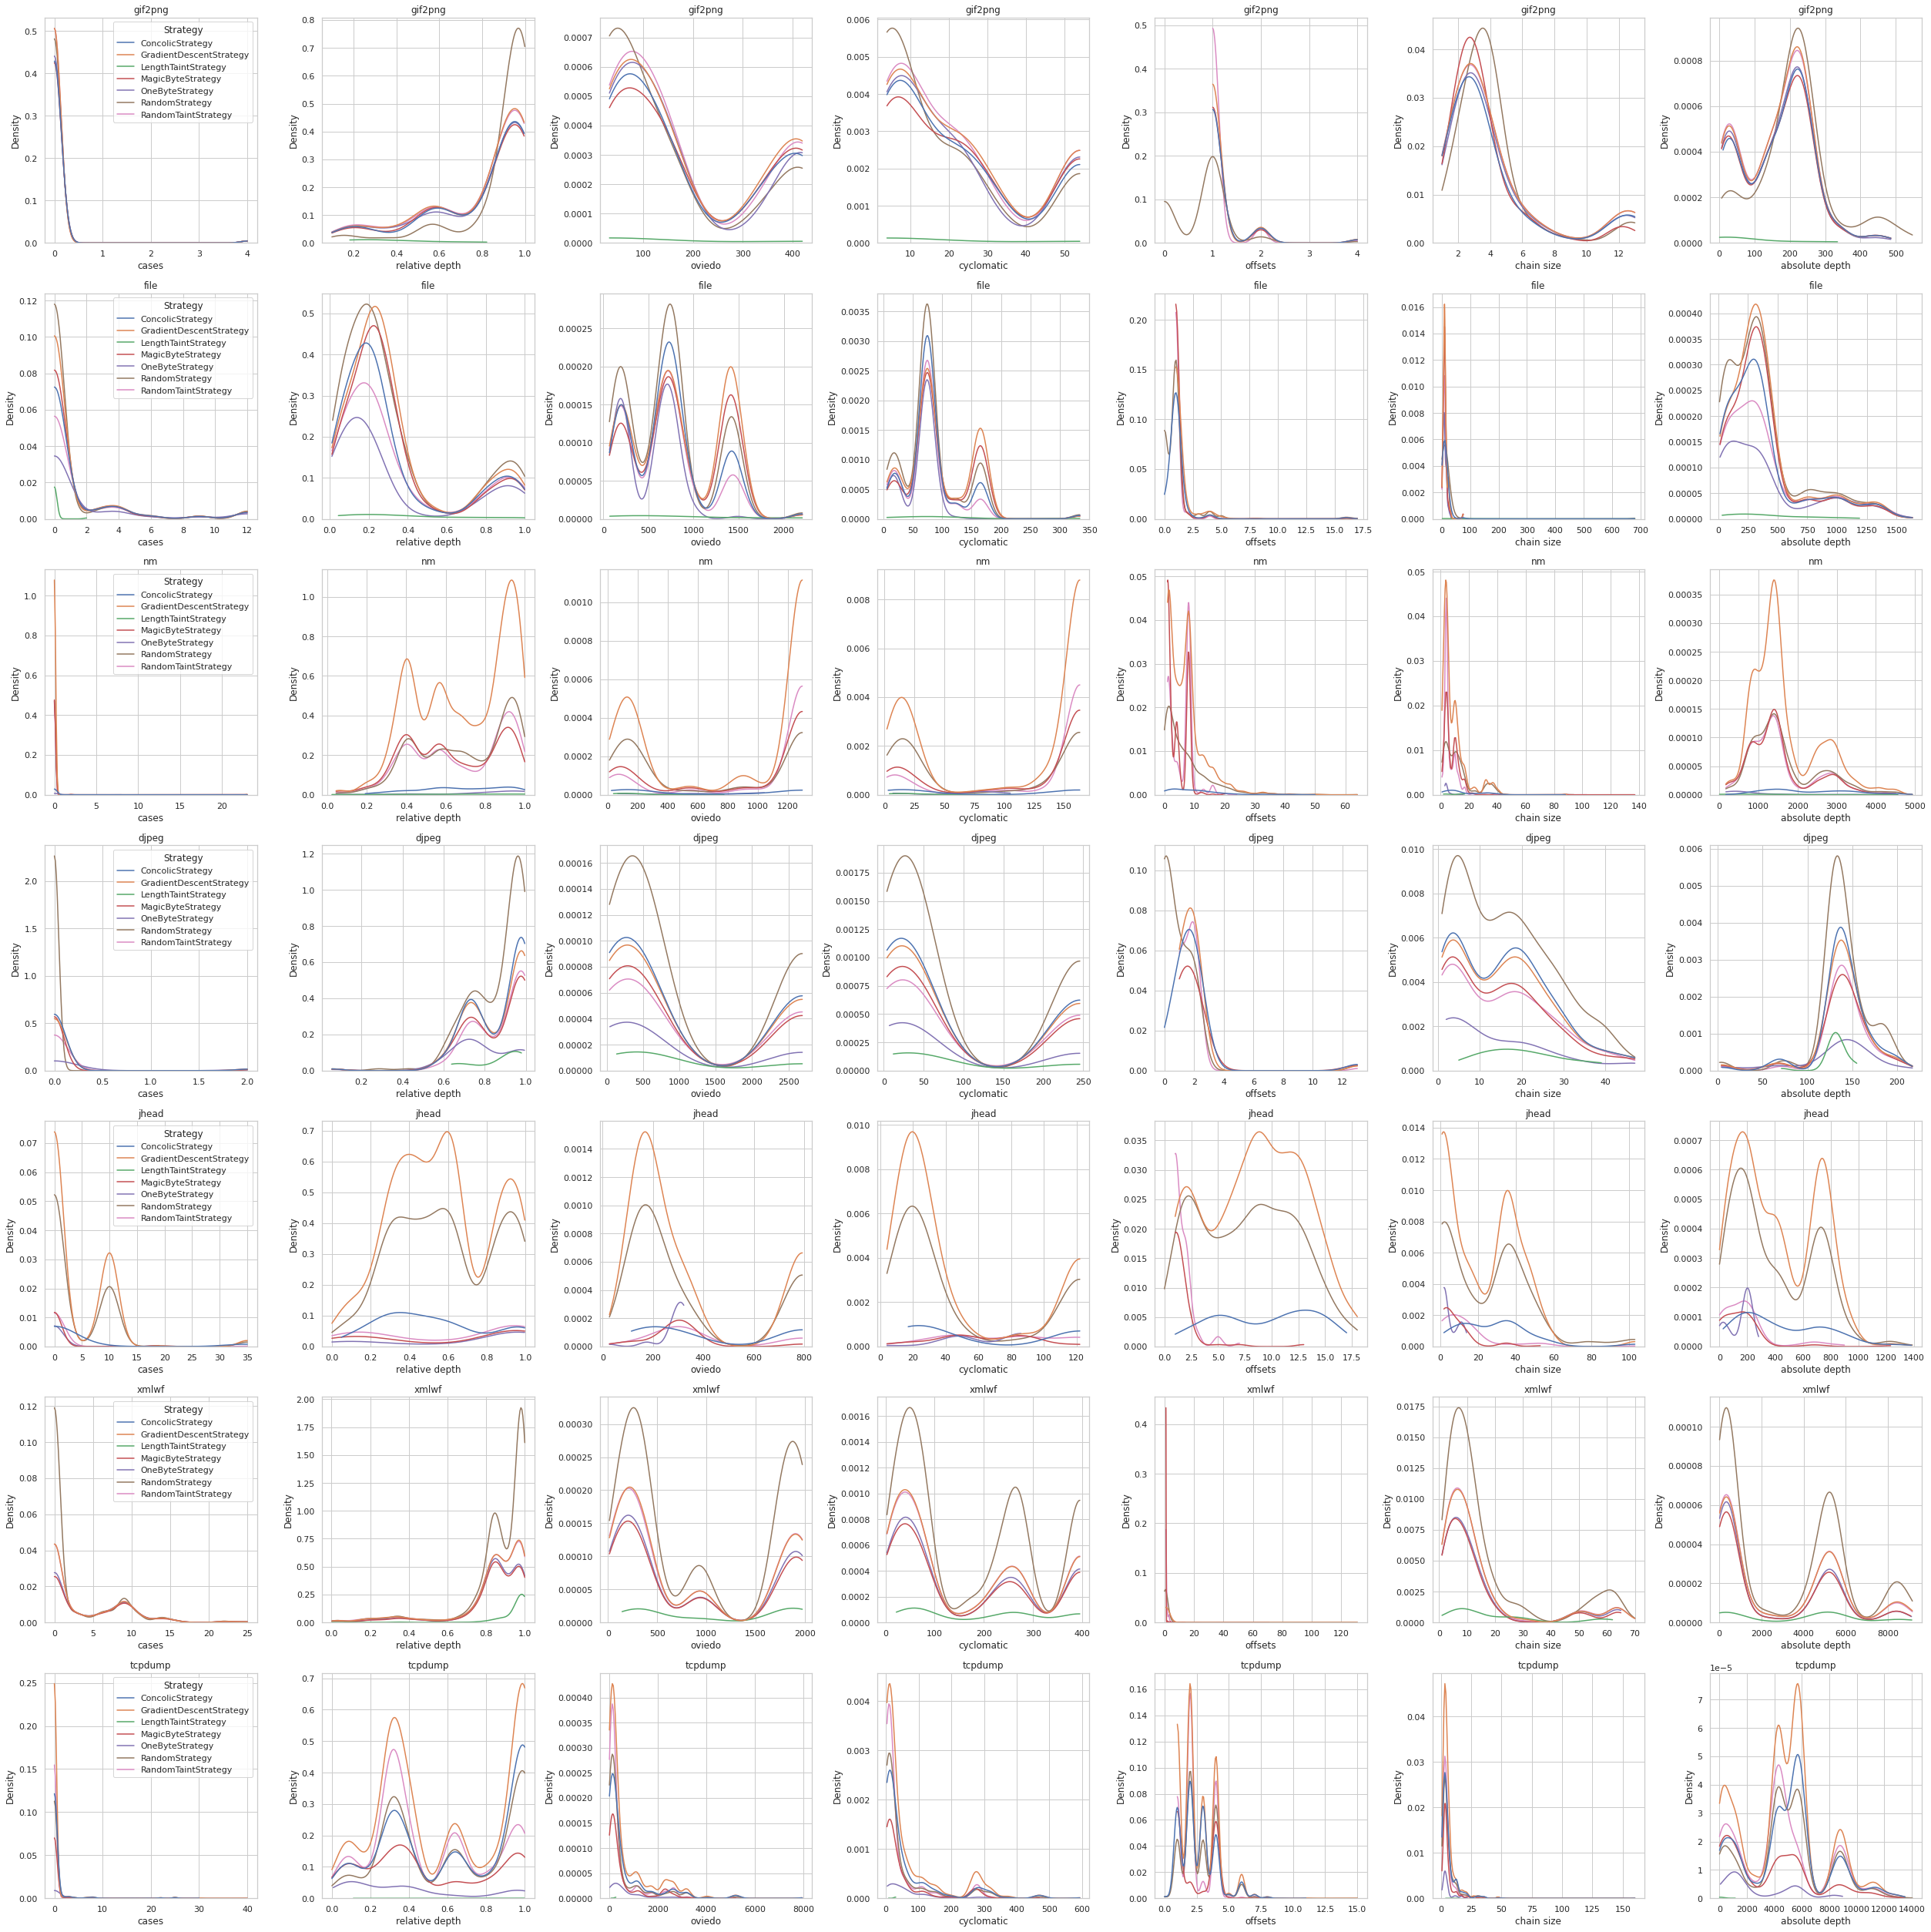

In [419]:
var_names_flipped = var_names.copy()
var_names_flipped.remove('flipped')
var_names_flipped.remove('reachableness')
var_names_flipped.remove('totalTime')
var_names_flipped.remove('cmpid')
var_names_flipped.insert(0, var_names_flipped.pop(var_names_flipped.index('cases')))
def draw_hist_flipped_conditions():
    fig, axs = plt.subplots(len(programs),len(var_names_flipped), figsize=(len(var_names_flipped)*5, len(programs)*5))
    #axs = axs.flatten()

    for ax_program, program in zip(axs, programs):
        first = True
        for ax, var_name in zip(ax_program, var_names_flipped):
            program_data = df_copy[(df_copy.program == program) & (df_copy.flipped == 1)].copy()
            g = sns.kdeplot(data=program_data, x=var_name, hue="Strategy", ax=ax, cut=0)
            ax.title.set_text(program)
            print("Plotted %s %s" % (program, var_name))
            if not first:
                ax.get_legend().remove()
            first = False
            ax.set_xlabel(rename_label(ax.get_xlabel()))
    plt.tight_layout()
    return fig
fig = draw_hist_flipped_conditions()
fig.savefig(OUTPUT_FOLDER+'kde_flipped_conditions.png')

/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset

Plotted gif2png reachableness
Plotted file reachableness
Plotted nm reachableness
Plotted djpeg reachableness
Plotted jhead reachableness


No handles with labels found to put in legend.
/home/googelen/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


Plotted xmlwf reachableness
Plotted tcpdump reachableness


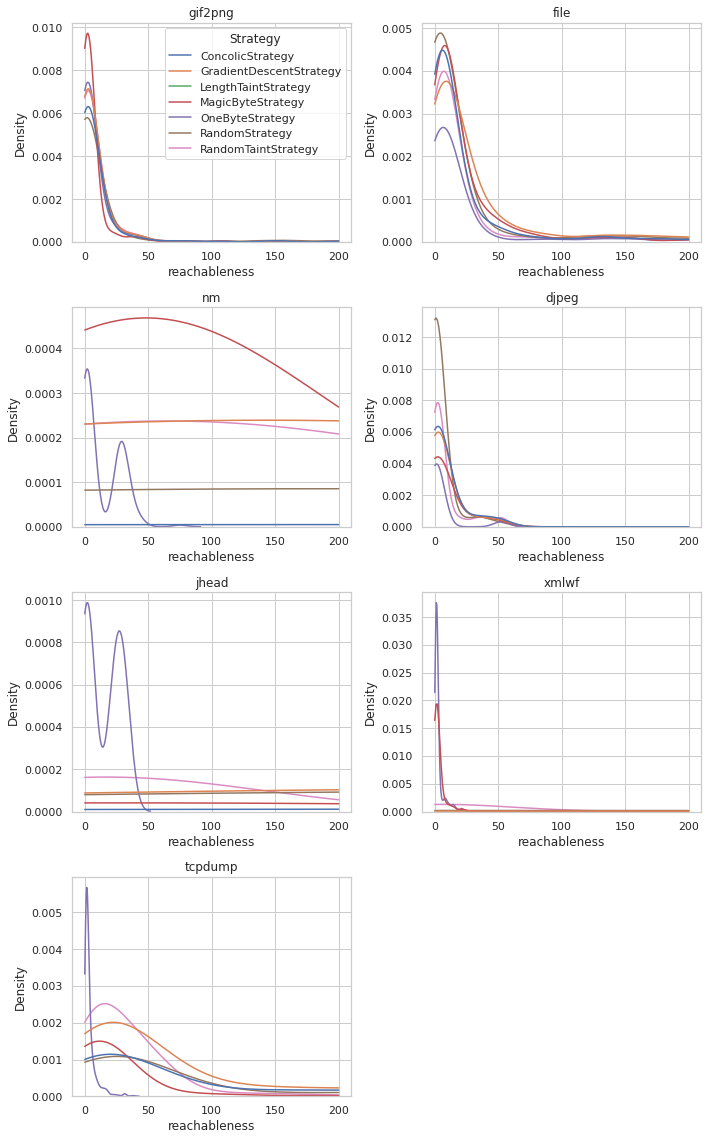

In [417]:
def draw_timing_dist():
    fig, axs = plt.subplots(4,2, figsize=(10,16))
    axs = axs.flatten().tolist()
    ax_to_remove = axs.pop()
    ax_to_remove.set_axis_off()
    first = True
    for ax, program in zip(axs, programs):
        program_data = df_copy[(df_copy.program == program) & (df_copy.flipped == 1)].copy()
        g = sns.kdeplot(data=program_data, x='reachableness', ax=ax, hue='Strategy', clip=(0,200))
        ax.title.set_text(program)
        print("Plotted %s %s" % (program, 'reachableness'))
        if not first:
            ax.legend().remove()
        first = False
    plt.tight_layout()
    return fig
draw_timing_dist().savefig(OUTPUT_FOLDER + 'kde_reachableness.png')

### Check logarithmic timing distribution using kde for flipped conditions

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Plotted gif2png totalTime
Plotted file totalTime
Plotted nm totalTime
Plotted djpeg totalTime
Plotted jhead totalTime


No handles with labels found to put in legend.
No handles with labels found to put in legend.


Plotted xmlwf totalTime
Plotted tcpdump totalTime


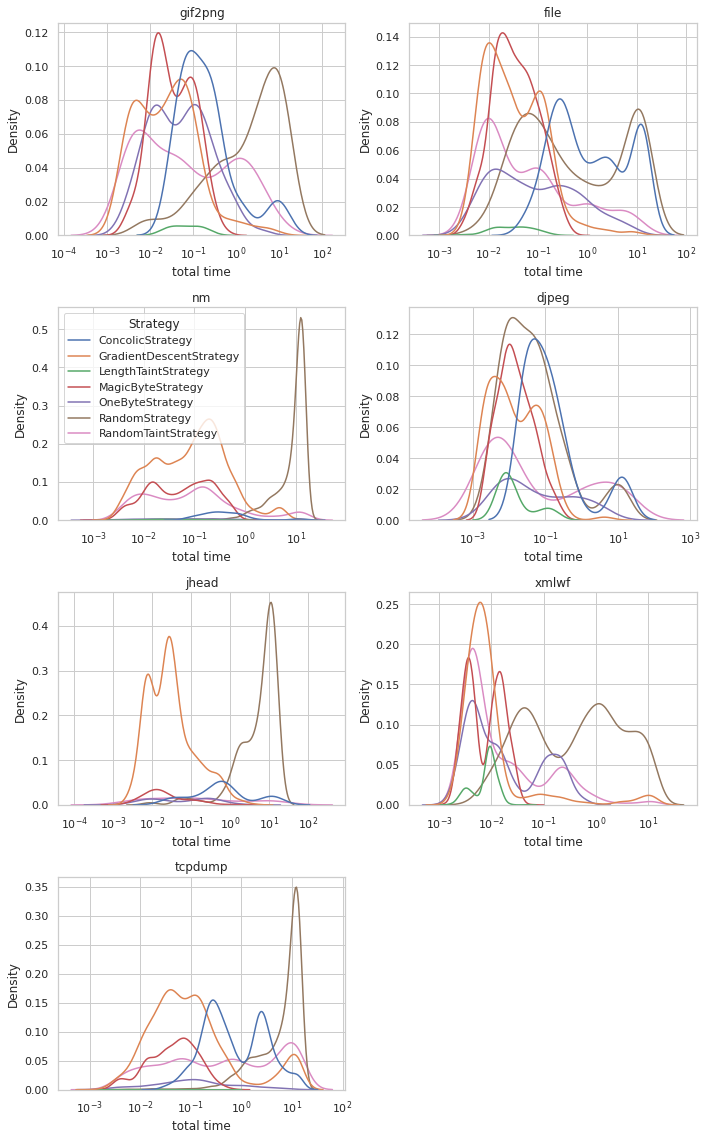

In [439]:
def draw_timing_dist():
    fig, axs = plt.subplots(4,2, figsize=(10,16))
    axs = axs.flatten().tolist()
    ax_to_remove = axs.pop()
    ax_to_remove.set_axis_off()
    count = 0
    for ax, program in zip(axs, programs):
        program_data = df_copy[(df_copy.program == program) & (df_copy.flipped == 1)].copy()
        g = sns.kdeplot(data=program_data, x='totalTime', ax=ax, hue='Strategy', log_scale=10)
        ax.title.set_text(program)
        ax.set_xlabel("total time")
        if count != 2:
            ax.legend().remove()
        count += 1
        print("Plotted %s %s" % (program, 'totalTime'))
    plt.tight_layout()
    return fig
draw_timing_dist().savefig(OUTPUT_FOLDER + 'kde_flipped_timing.png')

In [537]:
df_flipped_concolic = df_copy[df_copy["flipped"] == 1]
concolic_data = df_flipped_concolic[df_flipped_concolic['nrOfOffsets'] != 0].groupby(["Strategy"])['totalTime'].describe().loc[["ConcolicStrategy"]].rename(index={'ConcolicStrategy': "Offsets available"})
concolic_data = concolic_data.append(df_flipped_concolic[df_flipped_concolic['nrOfOffsets'] == 0].groupby(["Strategy"])['totalTime'].describe().loc[["ConcolicStrategy"]]).rename(index={'ConcolicStrategy': "No offsets available"})
with open(OUTPUT_FOLDER+ 'tables/concolic_timing_diff.tex', 'w') as output_file:
    output_file.write(concolic_data.transpose().applymap(lambda x: round(x,2)).to_latex())
concolic_data

,count,mean,std,min,25%,50%,75%,max
Strategy,,,,,,,,
Offsets available,6287.0,1.848148,3.000851,0.022614,0.230986,0.483010,2.309362,14.978125
No offsets available,118.0,10.593713,5.059836,0.042291,11.814162,13.090578,13.229180,14.981796


### Feature selection for classification

In [328]:
#construct all properties which can be flipped
from sklearn.feature_selection import mutual_info_classif
all_features = ['relative_depth', 'oviedo', 'cyclomatic', 'nrOfOffsets', 'cases', 'chain_size', 'depth', 'reachableness']
mutual_info_data = {}
for program in programs:
    mic = mutual_info_classif(df_copy.loc[df_copy.program == program, all_features], df_copy.loc[df_copy.program == program, "flipped"], random_state=0)
    mutual_info_data[program] = mic
mutual_info_data

{'gif2png': array([0.31647718, 0.04764275, 0.04687927, 0.12858627, 0.        ,
        0.08924382, 0.1631004 , 0.19650989]),
 'file': array([0.25734868, 0.13249086, 0.1271289 , 0.07128174, 0.0316221 ,
        0.07299502, 0.13976525, 0.0994326 ]),
 'nm': array([0.05566338, 0.04229278, 0.04022418, 0.0226045 , 0.00294857,
        0.0299902 , 0.02009004, 0.04181143]),
 'djpeg': array([0.21844853, 0.06506937, 0.06621249, 0.12813455, 0.        ,
        0.0920075 , 0.11167872, 0.15589441]),
 'jhead': array([0.03488573, 0.01163788, 0.01020593, 0.01007919, 0.00226329,
        0.02108389, 0.02747159, 0.02428926]),
 'xmlwf': array([0.18201748, 0.03157409, 0.02116491, 0.16237914, 0.073589  ,
        0.07318344, 0.07282209, 0.17077083]),
 'tcpdump': array([0.14101821, 0.05600157, 0.04534873, 0.02102361, 0.00461466,
        0.03289889, 0.05505241, 0.06672904])}

[Text(1, 0, 'relative_depth'), Text(2, 0, 'oviedo'), Text(3, 0, 'cyclomatic'), Text(4, 0, 'nrOfOffsets'), Text(5, 0, 'cases'), Text(6, 0, 'chain_size'), Text(7, 0, 'depth'), Text(8, 0, 'reachableness')]


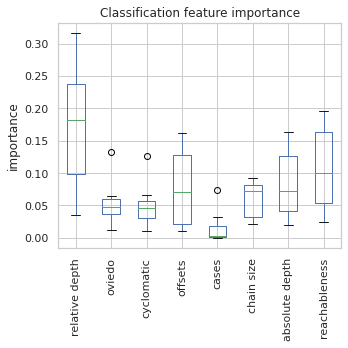

In [332]:
fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.set_title(f"Classification feature importance")
pd.DataFrame(mutual_info_data, index=all_features).transpose().plot.box(ax=ax)
ax.set_xticklabels(rename_labels(ax.get_xticklabels()))
plt.xticks(rotation=90)
plt.ylabel('importance')
plt.tight_layout()
fig.savefig(OUTPUT_FOLDER+'feature_selection.png')

## Feature selection for regression

In [334]:
#construct all properties which can be flipped
from sklearn.feature_selection import mutual_info_regression
all_features = ['relative_depth', 'oviedo', 'cyclomatic', 'nrOfOffsets', 'cases', 'chain_size', 'depth', 'reachableness']
mutual_info_data_regression = {}
for program in programs:
    mic = mutual_info_regression(df_copy.loc[(df_copy.program == program) & (df_copy.flipped == 1), all_features], df_copy.loc[(df_copy.program == program) & (df_copy.flipped == 1), "totalTime"], random_state=0)
    mutual_info_data_regression[program] = mic


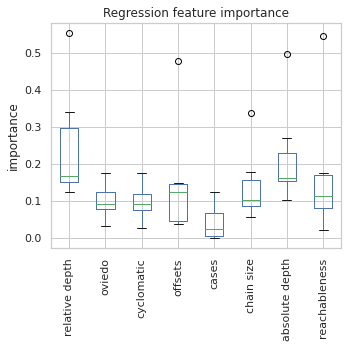

In [335]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title(f"Regression feature importance")
ax = pd.DataFrame(mutual_info_data_regression,index=all_features).transpose().plot.box(ax=ax)
ax.set_xticklabels(rename_labels(ax.get_xticklabels()))
plt.ylabel('importance')
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig(OUTPUT_FOLDER+'feature_selection_regression.png')

### Mann-Whitney U test to see which features are significant.

In [379]:
from scipy.stats import mannwhitneyu
mann_whitney_test_result = {}
for program in programs:
    mann_whitney_test_result[program] = {}
    for feature in all_features:
        program_data = df_copy[df_copy["program"] == program].copy()
        continuity = (True if feature == 'relative_depth' else False)
        mann_whitney_test_result[program][feature] = mannwhitneyu(program_data[program_data["flipped"] == 0][feature], program_data[program_data["flipped"] == 1][feature], use_continuity = continuity)
for feature in all_features:
    significant_count = 0
    for program in programs:
        if mann_whitney_test_result[program][feature].pvalue < 0.05:
            significant_count += 1
    print("%s is significant %d/%d times" % (feature, significant_count, len(programs)))

relative_depth is significant 7/7 times
oviedo is significant 7/7 times
cyclomatic is significant 6/7 times
nrOfOffsets is significant 7/7 times
cases is significant 7/7 times
chain_size is significant 5/7 times
depth is significant 7/7 times
reachableness is significant 7/7 times


In [380]:
mann_whitney_test_result_strategy = {}
for strategy in strategies:
    mann_whitney_test_result_strategy[strategy] = {}
    for feature in all_features:
        program_data = df_copy[df_copy["Strategy"] == strategy].copy()
        continuity = (True if feature == 'relative_depth' else False)
        mann_whitney_test_result_strategy[strategy][feature] = mannwhitneyu(program_data[program_data["flipped"] == 0][feature], program_data[program_data["flipped"] == 1][feature], use_continuity = continuity)
for feature in all_features:
    significant_count = 0
    for strategy in strategies:
        if mann_whitney_test_result_strategy[strategy][feature].pvalue < 0.05:
            significant_count += 1
    print("%s is significant %d/%d times" % (feature, significant_count, len(programs)))

relative_depth is significant 7/7 times
oviedo is significant 7/7 times
cyclomatic is significant 7/7 times
nrOfOffsets is significant 7/7 times
cases is significant 7/7 times
chain_size is significant 7/7 times
depth is significant 7/7 times
reachableness is significant 7/7 times


In [381]:
from matplotlib import colors
def _generic_heatmap_plot(values, axes, args, shrink_cbar=0.2):
        """Custom heatmap plot which mimics SciPy's sign_plot."""
        args.update({'linewidths': 0.5, 'linecolor': '0.5', 'square': True})
        # Annotate with values if less than 12 fuzzers.
        if values.shape[0] > 11 and args.get('annot'):
            args['annot'] = False

        axis = sns.heatmap(values, ax=axes, **args)
        axis.set_ylabel("")
        axis.set_xlabel("")
        label_args = {'rotation': 0, 'horizontalalignment': 'right'}
        axis.set_yticklabels(axis.get_yticklabels(), **label_args)
        label_args = {'rotation': 270, 'horizontalalignment': 'right'}
        axis.set_xticklabels(axis.get_xticklabels(), **label_args)

        cbar_ax = axis.collections[0].colorbar
        cbar_ax.outline.set_linewidth(1)
        cbar_ax.outline.set_edgecolor('0.5')

        pos_bbox = cbar_ax.ax.get_position()
        pos_bbox.y0 += shrink_cbar
        pos_bbox.y1 -= shrink_cbar
        cbar_ax.ax.set_position(pos_bbox)
        return axis
def _pvalue_heatmap_plot(p_values, axes=None, symmetric=False):
        """Draws heatmap plot for visualizing statistical test results.
        If |symmetric| is enabled, it masks out the upper triangle of the
        p-value table (as it is redundant with the lower triangle).
        """
        cmap_colors = ['#005a32', '#238b45', '#a1d99b', '#fbd7d4']
        cmap = colors.ListedColormap(cmap_colors)

        boundaries = [0, 0.001, 0.01, 0.05, 1]
        norm = colors.BoundaryNorm(boundaries, cmap.N)

        if symmetric:
            mask = np.zeros_like(p_values)
            mask[np.triu_indices_from(p_values)] = True

        heatmap_args = {
            'cmap': cmap,
            'mask': mask if symmetric else None,
            'fmt': ".3f",
            'norm': norm
        }

        axis = _generic_heatmap_plot(p_values, axes, heatmap_args)

        cbar_ax = axis.collections[0].colorbar
        cbar_ax.set_ticklabels(['p < 0.001', 'p < 0.01', 'p < 0.05', 'NS'])
        cbar_ax.set_ticks([0.0005, 0.005, 0.03, 0.5])
        cbar_ax.ax.tick_params(size=0)
        return axis

In [382]:
mann_whitney_p_values = pd.DataFrame(mann_whitney_test_result).applymap(lambda x: x.pvalue)
mann_whitney_p_values_strategy = pd.DataFrame(mann_whitney_test_result_strategy).applymap(lambda x: x.pvalue)
mann_whitney_p_values

,gif2png,file,nm,djpeg,jhead,xmlwf,tcpdump
relative_depth,2.197358e-02,0.000000e+00,6.885096e-43,6.007326e-16,1.170086e-06,5.627874e-69,2.340789e-33
oviedo,3.472032e-55,2.898616e-08,0.000000e+00,3.734769e-14,1.976683e-03,1.942197e-51,0.000000e+00
cyclomatic,3.472032e-55,3.173135e-14,0.000000e+00,5.799070e-16,1.919107e-01,1.339818e-34,0.000000e+00
nrOfOffsets,1.464911e-128,2.415347e-51,1.712015e-70,9.232914e-155,3.926871e-13,0.000000e+00,0.000000e+00
cases,1.791724e-05,0.000000e+00,1.271853e-28,6.972036e-03,4.607338e-05,0.000000e+00,4.037896e-159
chain_size,6.115295e-39,4.320243e-77,3.166145e-168,1.657065e-01,4.806727e-01,6.037760e-104,0.000000e+00
depth,2.763375e-10,0.000000e+00,3.444298e-38,1.348364e-15,3.566157e-09,2.629836e-18,7.051243e-18
reachableness,4.310864e-47,1.007675e-07,0.000000e+00,9.574918e-139,2.028768e-10,0.000000e+00,0.000000e+00


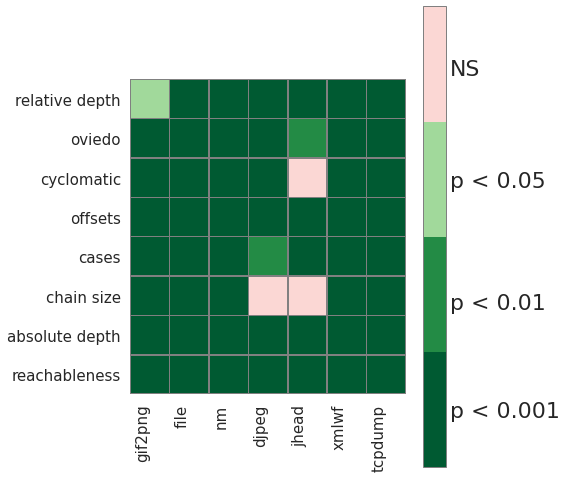

In [487]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax = _pvalue_heatmap_plot(mann_whitney_p_values, ax)
ax.set_xticklabels(rename_labels(ax.get_xticklabels()), fontsize=15)
ax.set_yticklabels(rename_labels(ax.get_yticklabels()), fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig(OUTPUT_FOLDER+'mann_whitney_u_programs.png')

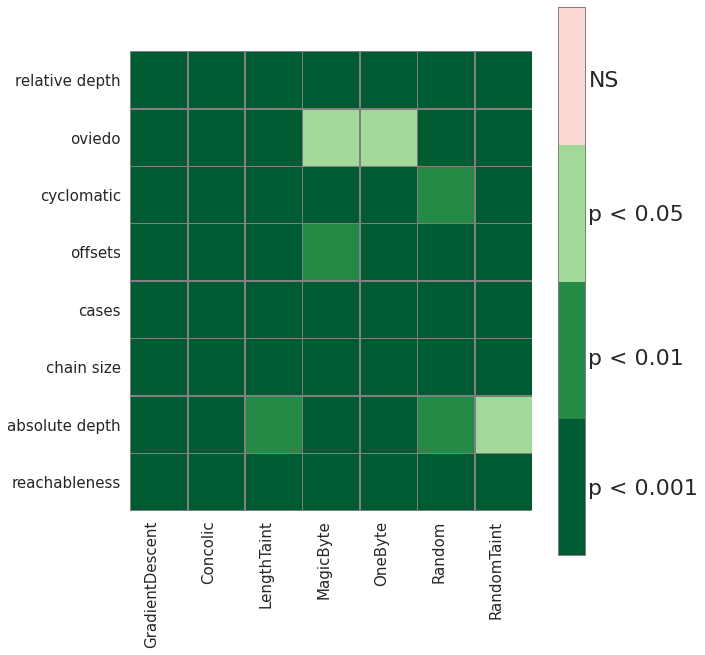

In [489]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax = _pvalue_heatmap_plot(mann_whitney_p_values_strategy, ax)
ax.set_xticklabels(rename_labels(ax.get_xticklabels()), fontsize=15)
ax.set_yticklabels(rename_labels(ax.get_yticklabels()), fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig(OUTPUT_FOLDER+'mann_whitney_u_strategy.png')

Nearly all features are significant most of the time. This test seems a bit useless.

From the graphs it is clear that the relative depth is the most important feature, the depth2 is used in the computation for the relative depth by dividing the trace length, so do not use this feature due to collinearity.
The chainsize, ovideo and nrOfOffsets are the next canidates, we discard the cyclomatic and cases, since cases is always the lowest and cyclomatic has a high collinearity with oviedo. The tracelengh is also used in the relative_depth so we discard this variable as well.
We also use reachableness, since this is a combination between nrOfOffsets and depth.

In [12]:
selected_features = ['relative_depth', 'oviedo',  'nrOfOffsets', 'chain_size', 'reachableness']

### Inspect selected features

In [13]:
def inspect_selected_features():
    features_to_plot = selected_features + ["flipped"]
    for program in programs:
        g = sns.pairplot(df_grouped[df_grouped.program == program], vars=features_to_plot, kind="hist", diag_kind="kde")
        g.fig.suptitle(program)
#inspect_selected_features()

### Create code to split in test and train set and cross validation

2 types of models:

- Classify flipped or not flipped based on properties
- Create for every strategy a time estimation to pick the minimal.

Do this on program basis and agregation basis AND compare the program level models with the difficult critical region statistic.

The first step is grouping the data together when we start looking at the flips.

The exact same data on a condition is now available multiple times in the dataset but some times with 1 and sometimes with 0 based on the Strategy. We will put a 1 if any strategy flipped the condition, and a 0 otherwise.

In [14]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
import sys

### Create ML models for classification

In [15]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [557]:
TEST_MODELS = {
    "LinearSVC": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', LinearSVC(random_state=0, max_iter=800))]),
        {"model__C":       [1, 10, 100, 1000, 10000]},
        ("accuracy", "precision_macro", "f1_macro")
    ),
    "SVC": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', SVC(random_state=0))]),
        {
            "model__C":       [1, 10, 100, 1000, 10000],
            "model__gamma":   [.001, .01, .1, "scale"]
        },
        ("accuracy", "precision_macro", "f1_macro")
    ),
    "NuSVC": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', NuSVC(random_state=0))]),
        {
            "model__gamma":   [.001, .01, .1, "scale"]
        },
        ("accuracy", "precision_macro", "f1_macro")
    ),
    "Gausian": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', GaussianProcessClassifier(random_state=0))]),
        {'model__multi_class': ['one_vs_rest']},
        ("accuracy", "precision_macro", "f1_macro")
    ),
    "DecisionTree": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', DecisionTreeClassifier (random_state=0))]),
        {
            "model__min_samples_leaf": [2**n for n in range(5)],
            "model__max_depth":       [None] + [2**n for n in range(8, 13)]
        },
        ("accuracy", "precision_macro", "f1_macro")
    ),
    #"NeuralNet": (
    #    Pipeline(steps=[('scaler', RobustScaler()), ('model', MLPClassifier(random_state=0))]),
    #    {
    #        'model__learning_rate': ["constant", "invscaling", "adaptive"],
    #        'model__hidden_layer_sizes': [(100,), (20,20), (20,20,20)],
    #        'model__alpha': [10.0 ** -n for n in range(1,7)],
    #        'model__activation': ["logistic", "relu", "Tanh"]
    #    },
    #    ("accuracy", "precision_macro", "f1_macro")
    #),    
}

In [430]:
test_classifier_data = pd.DataFrame(TEST_MODELS).transpose()[[1]].applymap(lambda x: "$"+str({mapping.replace("model__", "").replace("estimator__", ""): x[mapping] for mapping in x})
                                                                           .replace("{", "")
                                                                           .replace("}", "")
                                                                           .replace("'", "")
                                                                           .replace(":","\in")
                                                                           .replace("[","{")
                                                                           .replace("]","}")+"$").reset_index().rename(columns={'index': 'Model', 1: 'Parameters'})
#test_regressor_data.applymap(lambda x)
pd.set_option('display.max_colwidth', None)
tex = test_classifier_data.to_latex(index=False).replace("\$", "$").replace("\\textbackslash ",'\\').replace("},","}$\\\\&$")
with open(OUTPUT_FOLDER+'tables/classifiers_overview.tex', 'w') as output_file:
    output_file.write(tex)
test_classifier_data

,Model,Parameters
0,LinearSVC,"$C\in {1, 10, 100, 1000, 10000}$"
1,SVC,"$C\in {1, 10, 100, 1000, 10000}, gamma\in {0.001, 0.01, 0.1, scale}$"
2,NuSVC,"$gamma\in {0.001, 0.01, 0.1, scale}$"
3,Gausian,$multi_class\in {one_vs_rest}$
4,DecisionTree,"$min_samples_leaf\in {1, 2, 4, 8, 16}, max_depth\in {None, 256, 512, 1024, 2048, 4096}$"


In [17]:
TEST_MODELS['LinearSVC'][0].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'model', 'scaler__copy', 'scaler__quantile_range', 'scaler__unit_variance', 'scaler__with_centering', 'scaler__with_scaling', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__loss', 'model__max_iter', 'model__multi_class', 'model__penalty', 'model__random_state', 'model__tol', 'model__verbose'])

In [127]:
from sklearn.base import clone
def test_classifier(program, data, selected_features, feature_to_classify, models):
    trained_models = {}
    fitted_models = {}
    test_data = {}
    for model_name, (model, grid, scoring) in models.items():
        program_data = data[data.program == program]
        X_train, X_test, y_train, y_test = train_test_split(
            program_data[selected_features], 
            program_data[feature_to_classify],
            test_size=0.4,
            random_state=0
        )
        print("Training model %s with %s samples" % (model_name, len(X_train)))
        model_to_test = clone(model)
        trained_models[model_name] = GridSearchCV(model_to_test, scoring=scoring, param_grid=grid, refit=scoring[0], n_jobs = -1)
        try:
            fitted = fitted_models[model_name] = trained_models[model_name].fit(X_train, y_train)
        except Exception as e:
            print("Failed to fit model %s" % (model_name))
            print(e, file=sys.stderr)
            continue
        print("Program %s for model %s had best score %s" % (program, model_name, fitted.best_score_))
        print(fitted.best_params_)
        #print("Grid scores on development set:")
        #print(fitted.cv_results_)
        #means = fitted.cv_results_['mean_test_accuracy']
        #stds = fitted.cv_results_['std_test_accuracy']
        #for mean, std, params in zip(means, stds, fitted.cv_results_['params']):
        #    print("%0.3f (+/-%0.03f) for %r"
        #          % (mean, std * 2, params))
        #print()
        #print()
        #print("Detailed classification report:")
        #print()
        #print("The model is trained on the full development set.")
        #print("The scores are computed on the full evaluation set.")
        #print()
        y_true, y_pred = y_test, fitted.predict(X_test)
        test_data[model_name] = (y_true, y_pred)
        #print(classification_report(y_true, y_pred))
    return (fitted_models, test_data)

In [125]:
df_grouped.groupby(["program"]).describe()

relative_depth                                                    \
                 count      mean       std       min       25%       50%   
program                                                                    
djpeg            415.0  0.838665  0.155540  0.000000  0.730581  0.892086   
file            3956.0  0.482491  0.307629  0.000000  0.236671  0.362053   
gif2png          500.0  0.773937  0.257220  0.000000  0.614872  0.918916   
jhead           1017.0  0.553240  0.274576  0.000000  0.329032  0.543068   
nm             17113.0  0.698748  0.234473  0.000537  0.509519  0.730759   
tcpdump        13219.0  0.548370  0.329600  0.000000  0.312477  0.408427   
xmlwf           8980.0  0.852453  0.202638  0.000000  0.830769  0.918161   

                             flipped            ... chain_size         \
              75%       max    count      mean  ...        75%    max   
program                                         ...                     
djpeg    0.965035  0.994565    415.0  0.624096  ...       20.0   47.0   
file     0.794998  0.999532   3956.0  0.352376  ...       15.0  682.0   
gif2png  0.973568  0.998175    500.0  0.574000  ...        4.0   13.0   
jhead    0.842105  0.995961   1017.0  0.819076  ...       35.0  152.0   
nm       0.919167  0.999743  17113.0  0.522235  ...       14.0  137.0   
tcpdump  0.947847  0.999929  13219.0  0.606929  ...        8.0  160.0   
xmlwf    0.983791  0.999890   8980.0  0.642205  ...       17.0   70.0   

           depth                                                          \
           count         mean          std  min     25%     50%      75%   
program                                                                    
djpeg      415.0   134.585542    34.426099  0.0   128.0   135.0   148.00   
file      3956.0   801.105915   795.201671  0.0   290.0   428.0  1032.00   
gif2png    500.0   186.620000   112.691394  0.0   131.0   209.0   243.25   
jhead     1017.0   407.721731   286.894200  0.0   169.0   368.0   694.00   
nm       17113.0  1693.233390   899.384001  2.0  1081.0  1433.0  2216.00   
tcpdump  13219.0  4503.502459  2919.616749  0.0  1277.0  4335.0  5764.00   
xmlwf     8980.0  2996.776392  2916.042289  0.0   380.0  1456.5  5352.00   

                  
             max  
program           
djpeg      217.0  
file      4371.0  
gif2png    547.0  
jhead     1390.0  
nm        5220.0  
tcpdump  14048.0  
xmlwf     9158.0  

[7 rows x 88 columns]

In [558]:
df_grouped[df_grouped["program"] == programs[0]]

,relative_depth,program,flipped,id,Strategy,reachableness,totalTime,oviedo,cyclomatic,nrOfOffsets,cases,chain_size,depth
0,0.716904,gif2png,0,98922675_790838_0_288,GradientDescentStrategy,107,15.000632,85,10,1,0,13,352
1,0.983333,gif2png,1,98927229_35617_1_32,GradientDescentStrategy,1,0.080522,32,4,1,0,3,177
2,0.983806,gif2png,1,98927229_168856_0_32,GradientDescentStrategy,1,0.086801,32,4,1,0,3,243
3,0.923077,gif2png,1,98912808_145288_0_288,GradientDescentStrategy,7,0.139866,85,10,1,0,12,36
4,0.949275,gif2png,1,98927229_357687_1_32,GradientDescentStrategy,1,0.005589,32,4,1,0,3,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.956522,gif2png,1,98948910_131172_0_38,GradientDescentStrategy,2,0.003236,420,54,1,0,2,22
496,0.953368,gif2png,0,3422574507_415353_0_36,GradientDescentStrategy,8,15.000764,55,5,2,0,4,184
497,0.956522,gif2png,1,98954355_131172_0_38,GradientDescentStrategy,2,0.003083,420,54,1,0,2,132
498,0.525000,gif2png,1,3422555862_438868_0_36,GradientDescentStrategy,4,0.096040,55,5,4,0,1,21


In [128]:
model_results['gif2png'] = test_classifier('gif2png', df_grouped, selected_features, "flipped", TEST_MODELS)

NameError: name 'selected_features' is not defined

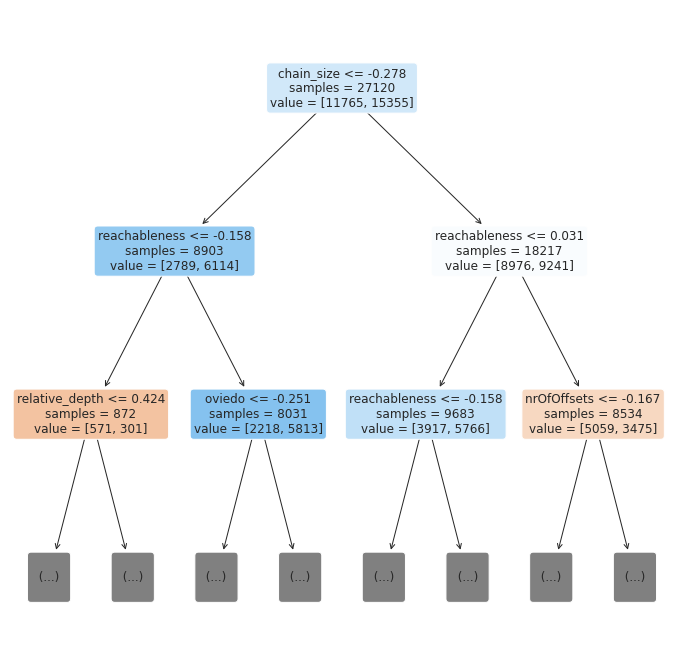

In [626]:
model_results['gif2png'][0]['DecisionTree'].best_params_
p = Pipeline(steps=[('scaler', RobustScaler()), ('model', DecisionTreeClassifier (random_state=0, max_depth=None, min_samples_leaf=8))])
X_train, X_test, y_train, y_test = train_test_split(
            df_grouped[selected_features], 
            df_grouped["flipped"],
            test_size=0.4,
            random_state=0
        )
p.fit(X_train, y_train)
check_is_fitted(p.named_steps['model'])
fig, ax = plt.subplots(1,1,figsize=(12,12))
plot_tree(p.named_steps['model'], ax=ax, max_depth=2, feature_names=selected_features, rounded=True, impurity=False, filled=True, fontsize=12)
plt.show()
fig.savefig(OUTPUT_FOLDER+'decision_tree.png')

In [647]:
model_results = {}
for program in programs:
    model_results[program] = test_classifier(program, df_grouped, selected_features, "flipped", TEST_MODELS)

Training model LinearSVC with 300 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program gif2png for model LinearSVC had best score 0.6766666666666666
{'model__C': 10}
Training model SVC with 300 samples
Program gif2png for model SVC had best score 0.7
{'model__C': 1, 'model__gamma': 0.1}
Training model NuSVC with 300 samples
Program gif2png for model NuSVC had best score 0.6666666666666667
{'model__gamma': 0.1}
Training model Gausian with 300 samples
Program gif2png for model Gausian had best score 0.6833333333333333
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 300 samples
Program gif2png for model DecisionTree had best score 0.7233333333333334
{'model__max_depth': None, 'model__min_samples_leaf': 8}
Training model LinearSVC with 2373 samples
Program file for model LinearSVC had best score 0.752627137463913
{'model__C': 1}
Training model SVC with 2373 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program file for model SVC had best score 0.8246973129025095
{'model__C': 1000, 'model__gamma': 0.1}
Training model NuSVC with 2373 samples
Program file for model NuSVC had best score 0.7914030646235843
{'model__gamma': 0.1}
Training model Gausian with 2373 samples
Program file for model Gausian had best score 0.8015198756384633
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 2373 samples
Program file for model DecisionTree had best score 0.8836873195647346
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearSVC with 10267 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program nm for model LinearSVC had best score 0.6618282030571548
{'model__C': 1}
Training model SVC with 10267 samples
Program nm for model SVC had best score 0.7771503549321748
{'model__C': 10000, 'model__gamma': 'scale'}
Training model NuSVC with 10267 samples
Program nm for model NuSVC had best score 0.7723775167411218
{'model__gamma': 'scale'}
Training model Gausian with 10267 samples
Program nm for model Gausian had best score 0.7351706079070172
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 10267 samples
Program nm for model DecisionTree had best score 0.8294530862048604
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearSVC with 249 samples
Program djpeg for model LinearSVC had best score 0.7269387755102041
{'model__C': 1}
Training model SVC with 249 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program djpeg for model SVC had best score 0.7913469387755102
{'model__C': 1000, 'model__gamma': 0.1}
Training model NuSVC with 249 samples
Program djpeg for model NuSVC had best score 0.755265306122449
{'model__gamma': 'scale'}
Training model Gausian with 249 samples
Program djpeg for model Gausian had best score 0.7431020408163265
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 249 samples
Program djpeg for model DecisionTree had best score 0.8592653061224489
{'model__max_depth': None, 'model__min_samples_leaf': 2}
Training model LinearSVC with 610 samples
Program jhead for model LinearSVC had best score 0.821311475409836
{'model__C': 1}
Training model SVC with 610 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program jhead for model SVC had best score 0.8524590163934427
{'model__C': 10000, 'model__gamma': 'scale'}
Training model NuSVC with 610 samples
Failed to fit model NuSVC
Training model Gausian with 610 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
specified nu is infeasible


Program jhead for model Gausian had best score 0.8459016393442622
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 610 samples
Program jhead for model DecisionTree had best score 0.8721311475409836
{'model__max_depth': None, 'model__min_samples_leaf': 8}
Training model LinearSVC with 5388 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program xmlwf for model LinearSVC had best score 0.6996987095673923
{'model__C': 10}
Training model SVC with 5388 samples
Program xmlwf for model SVC had best score 0.7516693281516202
{'model__C': 10000, 'model__gamma': 0.1}
Training model NuSVC with 5388 samples
Program xmlwf for model NuSVC had best score 0.7444280219051409
{'model__gamma': 0.1}
Training model Gausian with 5388 samples
Program xmlwf for model Gausian had best score 0.7433155384209901
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 5388 samples
Program xmlwf for model DecisionTree had best score 0.7954680682098112
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearSVC with 7931 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program tcpdump for model LinearSVC had best score 0.7221025815838175
{'model__C': 10}
Training model SVC with 7931 samples
Program tcpdump for model SVC had best score 0.807212526748304
{'model__C': 10000, 'model__gamma': 'scale'}
Training model NuSVC with 7931 samples
Program tcpdump for model NuSVC had best score 0.7865336343287318
{'model__gamma': 'scale'}
Training model Gausian with 7931 samples
Program tcpdump for model Gausian had best score 0.7867857616780732
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 7931 samples
Program tcpdump for model DecisionTree had best score 0.8222165275715122
{'model__max_depth': None, 'model__min_samples_leaf': 1}


In [548]:
def compare_results(model_results, models_to_test):
    results = {}
    for program in programs:
        results[program] = {}
        best_precision = (0,'')
        best_recall = (0,'')
        best_f1 = (0,'')
        best_accuracy = (0,'')
        for model in models_to_test.keys():
            if model not in model_results[program][0]:
                print("Model %s in program %s was skipped:" % (model, program))
                continue
            #print("Model %s in program %s has best parameters:" % (model, program))          
            #print(model_results[program][0][model].best_params_)
            y_true, y_pred = model_results[program][1][model]
            report = classification_report(y_true, y_pred, output_dict=True)
            if best_precision[0] < report['weighted avg']['precision']:
                best_precision = (report['weighted avg']['precision'], model)
                results[program]['precision'] = best_precision
            if best_recall[0] < report['weighted avg']['recall']:
                best_recall = (report['weighted avg']['recall'], model)
                results[program]['recall'] = best_recall
            if best_f1[0] < report['weighted avg']['f1-score']:
                best_f1 = (report['weighted avg']['f1-score'], model)
                results[program]['f1'] = best_f1
            if best_accuracy[0] < report['accuracy']:
                best_accuracy = (report['accuracy'], model)
                results[program]['accuracy'] = best_accuracy
        print("Program %s has:\nbest accuracy (%f) %s\nbest precision (%f) for %s\nbest recall (%f) for %s\nbest f1-score (%f) for %s" % (program, best_accuracy[0],best_accuracy[1],best_precision[0], best_precision[1], best_recall[0],best_recall[1], best_f1[0], best_f1[1]))
    return results

In [550]:
flipped_model_comparison_results = compare_results(model_results, TEST_MODELS)

Program gif2png has:
best accuracy (0.685000) Gausian
best precision (0.700263) for DecisionTree
best recall (0.685000) for Gausian
best f1-score (0.686633) for Gausian
Program file has:
best accuracy (0.902716) DecisionTree
best precision (0.901973) for DecisionTree
best recall (0.902716) for DecisionTree
best f1-score (0.902072) for DecisionTree
Program nm has:
best accuracy (0.840345) DecisionTree
best precision (0.840330) for DecisionTree
best recall (0.840345) for DecisionTree
best f1-score (0.840337) for DecisionTree
Program djpeg has:
best accuracy (0.855422) DecisionTree
best precision (0.860228) for DecisionTree
best recall (0.855422) for DecisionTree
best f1-score (0.856684) for DecisionTree
Model NuSVC in program jhead was skipped:
Program jhead has:
best accuracy (0.842752) SVC
best precision (0.842752) for SVC
best recall (0.842752) for SVC
best f1-score (0.842752) for SVC
Program xmlwf has:
best accuracy (0.807350) DecisionTree
best precision (0.807637) for DecisionTree
b

/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [551]:
classification_results_table = pd.DataFrame(flipped_model_comparison_results).applymap(lambda x: "%.3f (%s)" % (x[0], x[1])).transpose().rename(columns={'precision': 'Best precision', 'recall' : 'Best recall', 'f1' : 'Best f1-score', 'accuracy': 'Best accuracy'})
tex = classification_results_table.to_latex()
with open(OUTPUT_FOLDER+'tables/flipped_classification_results.tex', 'w') as output_file:
    output_file.write(tex)
classification_results_table

,Best precision,Best recall,Best f1-score,Best accuracy
gif2png,0.700 (DecisionTree),0.685 (Gausian),0.687 (Gausian),0.685 (Gausian)
file,0.902 (DecisionTree),0.903 (DecisionTree),0.902 (DecisionTree),0.903 (DecisionTree)
nm,0.840 (DecisionTree),0.840 (DecisionTree),0.840 (DecisionTree),0.840 (DecisionTree)
djpeg,0.860 (DecisionTree),0.855 (DecisionTree),0.857 (DecisionTree),0.855 (DecisionTree)
jhead,0.843 (SVC),0.843 (SVC),0.843 (SVC),0.843 (SVC)
xmlwf,0.808 (DecisionTree),0.807 (DecisionTree),0.807 (DecisionTree),0.807 (DecisionTree)
tcpdump,0.836 (DecisionTree),0.836 (DecisionTree),0.836 (DecisionTree),0.836 (DecisionTree)


In [388]:
from sklearn.tree import plot_tree
#plot_tree()
#plot_tree(model_results['gif2png'][0]['DecisionTree'].best_estimator_)

The classifier which most often works best is the decisiontree classifier

We also compare the results with a dummy classifier

In [23]:
from sklearn.dummy import DummyClassifier

In [24]:
DUMMY_MODELS = {
    "DummyClassifier": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', DummyClassifier(random_state=0))]),
        {"model__strategy":       ["most_frequent", "prior", "uniform"]},
        ("accuracy", "precision_macro", "f1_macro")
    ),
}

In [25]:
DUMMY_MODELS['DummyClassifier'][0].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'model', 'scaler__copy', 'scaler__quantile_range', 'scaler__unit_variance', 'scaler__with_centering', 'scaler__with_scaling', 'model__constant', 'model__random_state', 'model__strategy'])

In [84]:
dummy_model_results = {}
for program in programs:
    dummy_model_results[program] = test_classifier(program, df_grouped, selected_features, "flipped", DUMMY_MODELS)

Training model DummyClassifier with 300 samples
Program gif2png for model DummyClassifier had best score 0.5633333333333332
{'model__strategy': 'most_frequent'}
Training model DummyClassifier with 2373 samples
Program file for model DummyClassifier had best score 0.6485463024650233
{'model__strategy': 'most_frequent'}
Training model DummyClassifier with 10267 samples
Program nm for model DummyClassifier had best score 0.521087007352861
{'model__strategy': 'most_frequent'}
Training model DummyClassifier with 249 samples
Program djpeg for model DummyClassifier had best score 0.6184489795918366
{'model__strategy': 'most_frequent'}
Training model DummyClassifier with 610 samples
Program jhead for model DummyClassifier had best score 0.821311475409836
{'model__strategy': 'most_frequent'}
Training model DummyClassifier with 5388 samples
Program xmlwf for model DummyClassifier had best score 0.6375279714316722
{'model__strategy': 'most_frequent'}
Training model DummyClassifier with 7931 sampl

In [304]:
def compare_results_with_dummy_classifier(real_results, dummy_results, models_to_test):
    for program in programs:
        y_true_dummy, y_pred_dummy = dummy_results[program][1]['DummyClassifier']
        report_dummy = classification_report(y_true_dummy, y_pred_dummy, output_dict=True)
        best_precision = (report_dummy['weighted avg']['precision'], 'DummyClassifier')
        best_recall = (report_dummy['weighted avg']['recall'], 'DummyClassifier')
        best_f1 = (report_dummy['weighted avg']['f1-score'],'DummyClassifier')
        best_accuracy = (report_dummy['accuracy'],'DummyClassifier')
        for model in models_to_test.keys():
            if model not in model_results[program][0]:
                print("Model %s in program %s was skipped:" % (model, program))
                continue
            #print("Model %s in program %s has best parameters:" % (model, program))          
            #print(model_results[program][0][model].best_params_)
            y_true, y_pred = model_results[program][1][model]
            report = classification_report(y_true, y_pred, output_dict=True)
            if best_precision[0] < report['weighted avg']['precision']:
                best_precision = (report['weighted avg']['precision'], model)
            if best_recall[0] < report['weighted avg']['recall']:
                best_recall = (report['weighted avg']['recall'], model)
            if best_f1[0] < report['weighted avg']['f1-score']:
                best_f1 = (report['weighted avg']['f1-score'], model)
            if best_accuracy[0] < report['accuracy']:
                best_accuracy = (report['accuracy'], model)
        print("Program %s has:\nbest accuracy %s\nbest precision for %s\nbest recall for %s\nbest f1-score for %s" % (program, best_accuracy[1], best_precision[1], best_recall[1], best_f1[1]))

In [305]:
compare_results_with_dummy_classifier(model_results, dummy_model_results, TEST_MODELS)

Program gif2png has:
best accuracy Gausian
best precision for DecisionTree
best recall for Gausian
best f1-score for Gausian
Program file has:
best accuracy DecisionTree
best precision for DecisionTree
best recall for DecisionTree
best f1-score for DecisionTree
Program nm has:
best accuracy DecisionTree
best precision for DecisionTree
best recall for DecisionTree
best f1-score for DecisionTree
Program djpeg has:
best accuracy DecisionTree
best precision for DecisionTree
best recall for DecisionTree
best f1-score for DecisionTree
Model NuSVC in program jhead was skipped:
Program jhead has:
best accuracy SVC
best precision for SVC
best recall for SVC
best f1-score for SVC
Program xmlwf has:
best accuracy DecisionTree
best precision for DecisionTree
best recall for DecisionTree
best f1-score for DecisionTree
Program tcpdump has:
best accuracy DecisionTree
best precision for DecisionTree
best recall for DecisionTree
best f1-score for DecisionTree


/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.

Dummy is always outperformed by other models

### Create regressors, train models for every strategy and pick the one which takes the least amount of time.
Check if this corresponds with the real data.

There are 2 ways to do this:

- Create regressors for every program and every strategy, pick the one with the least amount of time estimated.
- Create classification by combining the data and selecting the strategy with the lowest time. (I go for this)

In the end we will do a critical distance analysis.

In [27]:
strategies = df_copy.Strategy.unique()
df_grouped_strategy = df_copy[df_copy["Strategy"] == strategies[0]].copy()
df_grouped_strategy = df_grouped_strategy.reset_index(drop=True)

for strategy in strategies:
    df_temp = df_copy[df_copy["Strategy"] == strategy].copy().reset_index(drop=True)
    df_grouped_strategy.Strategy = df_grouped_strategy.Strategy.where(
        ((df_grouped_strategy.totalTime < df_temp.totalTime) & (df_temp.flipped == 1) & (df_grouped_strategy.flipped == 1)) | 
        (df_temp.flipped == 0), other=strategy)
    df_grouped_strategy.flipped |= df_temp.flipped
#Only select flipped samples
df_grouped_strategy = df_grouped_strategy[df_grouped_strategy["flipped"] == 1]
print(df_grouped_strategy.Strategy.unique())

['RandomTaintStrategy', 'OneByteStrategy', 'MagicByteStrategy', 'RandomStrategy', 'GradientDescentStrategy', 'LengthTaintStrategy', 'ConcolicStrategy']
Categories (7, object): ['RandomTaintStrategy', 'OneByteStrategy', 'MagicByteStrategy', 'RandomStrategy', 'GradientDescentStrategy', 'LengthTaintStrategy', 'ConcolicStrategy']


In [28]:
strategy_model_results = {}
for program in programs:
    strategy_model_results[program] = test_classifier(program, df_grouped_strategy, selected_features, "Strategy", TEST_MODELS)

Training model LinearSVC with 172 samples
Program gif2png for model LinearSVC had best score 0.5403361344537815
{'model__C': 10000}
Training model SVC with 172 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Program gif2png for model SVC had best score 0.6042016806722689
{'model__C': 1000, 'model__gamma': 0.1}
Training model NuSVC with 172 samples
Failed to fit model NuSVC
Training model Gausian with 172 samples
Program gif2png for model Gausian had best score 0.6042016806722689
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 172 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
specified nu is infeasible
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Program gif2png for model DecisionTree had best score 0.5515966386554622
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearSVC with 815 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program file for model LinearSVC had best score 0.4895705521472392
{'model__C': 10}
Training model SVC with 815 samples
Program file for model SVC had best score 0.48466257668711654
{'model__C': 100, 'model__gamma': 0.1}
Training model NuSVC with 815 samples
Failed to fit model NuSVC
Training model Gausian with 815 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
specified nu is infeasible


Program file for model Gausian had best score 0.5104294478527607
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 815 samples
Program file for model DecisionTree had best score 0.4674846625766872
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearSVC with 5362 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Program nm for model LinearSVC had best score 0.5885870623582925
{'model__C': 10}
Training model SVC with 5362 samples
Program nm for model SVC had best score 0.7118587514431571
{'model__C': 100, 'model__gamma': 0.1}
Training model NuSVC with 5362 samples
Failed to fit model NuSVC
Training model Gausian with 5362 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
specified nu is infeasible
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Program nm for model Gausian had best score 0.7047721550680891
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 5362 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Program nm for model DecisionTree had best score 0.7275241337580505
{'model__max_depth': None, 'model__min_samples_leaf': 8}
Training model LinearSVC with 155 samples
Program djpeg for model LinearSVC had best score 0.5548387096774193
{'model__C': 100}
Training model SVC with 155 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Program djpeg for model SVC had best score 0.6451612903225806
{'model__C': 10000, 'model__gamma': 0.001}
Training model NuSVC with 155 samples
Failed to fit model NuSVC
Training model Gausian with 155 samples
Program djpeg for model Gausian had best score 0.5548387096774193
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 155 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
specified nu is infeasible
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Program djpeg for model DecisionTree had best score 0.6129032258064516
{'model__max_depth': None, 'model__min_samples_leaf': 16}
Training model LinearSVC with 499 samples
Program jhead for model LinearSVC had best score 0.9118383838383839
{'model__C': 1}
Training model SVC with 499 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Program jhead for model SVC had best score 0.9138383838383838
{'model__C': 1, 'model__gamma': 0.1}
Training model NuSVC with 499 samples
Failed to fit model NuSVC
Training model Gausian with 499 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
specified nu is infeasible
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Program jhead for model Gausian had best score 0.9118383838383839
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 499 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Program jhead for model DecisionTree had best score 0.8957979797979798
{'model__max_depth': None, 'model__min_samples_leaf': 8}
Training model LinearSVC with 3460 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program xmlwf for model LinearSVC had best score 0.653757225433526
{'model__C': 1}
Training model SVC with 3460 samples
Program xmlwf for model SVC had best score 0.700578034682081
{'model__C': 1000, 'model__gamma': 0.1}
Training model NuSVC with 3460 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
specified nu is infeasible


Failed to fit model NuSVC
Training model Gausian with 3460 samples
Program xmlwf for model Gausian had best score 0.6962427745664741
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 3460 samples
Program xmlwf for model DecisionTree had best score 0.7127167630057804
{'model__max_depth': None, 'model__min_samples_leaf': 16}
Training model LinearSVC with 4813 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Program tcpdump for model LinearSVC had best score 0.6208213245596423
{'model__C': 1}
Training model SVC with 4813 samples
Program tcpdump for model SVC had best score 0.7186799308294636
{'model__C': 10000, 'model__gamma': 'scale'}
Training model NuSVC with 4813 samples
Failed to fit model NuSVC
Training model Gausian with 4813 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
specified nu is infeasible
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Program tcpdump for model Gausian had best score 0.6947873826378499
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 4813 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Program tcpdump for model DecisionTree had best score 0.714939670079857
{'model__max_depth': None, 'model__min_samples_leaf': 16}


In [29]:
strategy_model_comparison_results = compare_results(strategy_model_results, TEST_MODELS)

Model NuSVC in program gif2png was skipped:
Program gif2png has:
best precision for DecisionTree
best recall for Gausian
best f1-score for Gausian
Model NuSVC in program file was skipped:
Program file has:
best precision for DecisionTree
best recall for Gausian
best f1-score for DecisionTree
Model NuSVC in program nm was skipped:


/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.

Program nm has:
best precision for DecisionTree
best recall for DecisionTree
best f1-score for DecisionTree


/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.

Model NuSVC in program djpeg was skipped:
Program djpeg has:
best precision for LinearSVC
best recall for LinearSVC
best f1-score for LinearSVC
Model NuSVC in program jhead was skipped:
Program jhead has:
best precision for DecisionTree
best recall for DecisionTree
best f1-score for DecisionTree
Model NuSVC in program xmlwf was skipped:
Program xmlwf has:
best precision for DecisionTree
best recall for DecisionTree
best f1-score for DecisionTree
Model NuSVC in program tcpdump was skipped:
Program tcpdump has:
best precision for DecisionTree
best recall for DecisionTree
best f1-score for DecisionTree


/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.

The model which comes out of the test most often is the DecisionTreeClassifier. This data does not look very promising.

## We could use the alternative approach by creating a regression model for every strategy and taking the strategy with the lowest estimated time for a strategy

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import MultiTaskLasso
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor

In [31]:
TEST_REGRESSORS = {
    "LinearRegression": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', LinearRegression(n_jobs=-1))]),
        {"model__normalize": [False]},
        ("neg_median_absolute_error")
    ),
    "Ridge": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', Ridge(random_state=0, max_iter=400))]),
        {"model__alpha":       [0.01, 0.1, 1, 10, 100, 1000]},
        ("neg_median_absolute_error")
    ),
    "ElasticNet": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', ElasticNet(random_state=0, max_iter=400))]),
        {"model__alpha":       [0.01, 0.1, 1, 10, 100, 1000]},
        ("neg_median_absolute_error")
    ),
    "Lasso": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', Lasso(random_state=0, max_iter=400))]),
        {"model__alpha":       [0.01, 0.1, 1, 10, 100, 1000]},
        ("neg_median_absolute_error")
    ),
    "MultiTaskLasso": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', MultiTaskLasso(random_state=0, max_iter=400))]),
        {"model__alpha":       [0.01, 0.1, 1, 10, 100, 1000]},
        ("neg_median_absolute_error")
    ),
    "SVR": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', MultiOutputRegressor(SVR()))]),
        {
            "model__estimator__C":       [1, 10, 100, 1000, 10000],
            "model__estimator__gamma":   [.001, .01, .1, "scale"]
        },
        ("neg_median_absolute_error")
    ),
    "NuSVR": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', MultiOutputRegressor(NuSVR()))]),
        {
            "model__estimator__gamma":   [.001, .01, .1, "scale"]
        },
        ("neg_median_absolute_error")
    ),
    "LinearSVR": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', MultiOutputRegressor(LinearSVR(max_iter=800)))]),
        {
            "model__estimator__C":       [1, 10, 100, 1000, 10000],
        },
        ("neg_median_absolute_error")
    ),
    "SGDRegressor": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', MultiOutputRegressor(SGDRegressor(random_state=0, max_iter=400)))]),
        {"model__estimator__alpha":       [0.0001, 0.001, 0.01, 0.1]},
        ("neg_median_absolute_error")
    ),
    "GaussianProcessRegressor": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', GaussianProcessRegressor(random_state=0))]),
        {"model__alpha" : [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]},
        ("neg_median_absolute_error")
    ),
    "DecisionTreeRegressor": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', DecisionTreeRegressor(random_state=0))]),
        {
            "model__min_samples_leaf": [2**n for n in range(5)],
            "model__max_depth":       [None] + [2**n for n in range(8, 13)]
        },
        ("neg_median_absolute_error")
    ),
}

In [427]:
test_regressor_data = pd.DataFrame(TEST_REGRESSORS).transpose()[[1]].applymap(lambda x: "$"+str({mapping.replace("model__", "").replace("estimator__", ""): x[mapping] for mapping in x}).replace("{", "")
                                                                           .replace("}", "")
                                                                           .replace("'", "")
                                                                           .replace(":","\in")
                                                                           .replace("[","{")
                                                                           .replace("]","}")+"$").reset_index().rename(columns={'index': 'Model', 1: 'Parameters'})
#test_regressor_data.applymap(lambda x)
pd.set_option('display.max_colwidth', None)
tex = test_regressor_data.to_latex(index=False).replace("\$", "$").replace("\\textbackslash ","\\").replace("},","}$\\\\&$").replace("1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05", "10^{-10}, 10^{-9}, 10^{-8}, 10^{-7}, 10^{-6}, 10^{-5}")
with open(OUTPUT_FOLDER+'tables/regressor_overview.tex', 'w') as output_file:
    output_file.write(tex)
print(tex)
test_regressor_data

\begin{tabular}{ll}
\toprule
                    Model &                                                                               Parameters \\
\midrule
         LinearRegression &                                                                   $normalize\in \{False\}$ \\
                    Ridge &                                                 $alpha\in \{0.01, 0.1, 1, 10, 100, 1000\}$ \\
               ElasticNet &                                                 $alpha\in \{0.01, 0.1, 1, 10, 100, 1000\}$ \\
                    Lasso &                                                 $alpha\in \{0.01, 0.1, 1, 10, 100, 1000\}$ \\
           MultiTaskLasso &                                                 $alpha\in \{0.01, 0.1, 1, 10, 100, 1000\}$ \\
                      SVR &                     $C\in \{1, 10, 100, 1000, 10000\}\\ gamma\in \{0.001, 0.01, 0.1, scale\}$ \\
                    NuSVR &                                                     $gamma\in \{0.001, 0.01, 0.

,Model,Parameters
0,LinearRegression,$normalize\in {False}$
1,Ridge,"$alpha\in {0.01, 0.1, 1, 10, 100, 1000}$"
2,ElasticNet,"$alpha\in {0.01, 0.1, 1, 10, 100, 1000}$"
3,Lasso,"$alpha\in {0.01, 0.1, 1, 10, 100, 1000}$"
4,MultiTaskLasso,"$alpha\in {0.01, 0.1, 1, 10, 100, 1000}$"
5,SVR,"$C\in {1, 10, 100, 1000, 10000}, gamma\in {0.001, 0.01, 0.1, scale}$"
6,NuSVR,"$gamma\in {0.001, 0.01, 0.1, scale}$"
7,LinearSVR,"$C\in {1, 10, 100, 1000, 10000}$"
8,SGDRegressor,"$alpha\in {0.0001, 0.001, 0.01, 0.1}$"
9,GaussianProcessRegressor,"$alpha\in {1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05}$"


Prepare data:

In [32]:
df_copy.sort_values(["Strategy", "id"])
strategies = df_copy.Strategy.unique()
df_timings = df_copy[df_copy["Strategy"] == strategies[0]].copy()
df_timings = df_timings.reset_index(drop=True)
#print(df_grouped.head(1))
#print(df_grouped.tail(1))
for strategy in strategies:
    df_temp = df_copy[df_copy["Strategy"] == strategy].copy().reset_index(drop=True)
    #print(df_temp.head(1))
    #print(df_temp.tail(1))
    df_timings.flipped |= df_temp.flipped
    df_timings[strategy + "_timing"] = df_temp.totalTime
df_timings = df_timings[df_timings["flipped"] == 1]
print(df_timings.head(8))

   relative_depth  program  flipped                       id  \
1        0.983333  gif2png        1      98927229_35617_1_32   
2        0.983806  gif2png        1     98927229_168856_0_32   
3        0.923077  gif2png        1    98912808_145288_0_288   
4        0.949275  gif2png        1     98927229_357687_1_32   
5        0.978632  gif2png        1     98909640_289905_1_32   
6        0.976471  gif2png        1    98922675_193050_1_288   
7        0.995546  gif2png        1  98909640_168856_1_32771   
8        0.991031  gif2png        1     98899872_765407_1_32   

                  Strategy  reachableness  totalTime  oviedo  cyclomatic  \
1  GradientDescentStrategy              1   0.080522      32           4   
2  GradientDescentStrategy              1   0.086801      32           4   
3  GradientDescentStrategy              7   0.139866      85          10   
4  GradientDescentStrategy              1   0.005589      32           4   
5  GradientDescentStrategy              0  

In [33]:
def get_timing_features(program):
    timing_features = [s+"_timing" for s in strategies ]
    if program == 'tcpdump':
        timing_features.remove('ConcolicStrategy_timing')
    return timing_features

In [356]:
regressor_results = {}
for program in programs:
    regressor_results[program] = test_classifier(program, df_timings, selected_features, get_timing_features(program), TEST_REGRESSORS)

Training model LinearRegression with 172 samples
Program gif2png for model LinearRegression had best score -0.9509858562052205
{'model__normalize': False}
Training model Ridge with 172 samples
Program gif2png for model Ridge had best score -0.9510160888634692
{'model__alpha': 0.01}
Training model ElasticNet with 172 samples
Program gif2png for model ElasticNet had best score -0.9548764244921017
{'model__alpha': 0.01}
Training model Lasso with 172 samples
Program gif2png for model Lasso had best score -0.9545164588362518
{'model__alpha': 0.01}
Training model MultiTaskLasso with 172 samples
Program gif2png for model MultiTaskLasso had best score -0.9528576277561568
{'model__alpha': 0.01}
Training model SVR with 172 samples
Program gif2png for model SVR had best score -0.5084447891250437
{'model__estimator__C': 100, 'model__estimator__gamma': 0.1}
Training model NuSVR with 172 samples
Program gif2png for model NuSVR had best score -0.8018043326069539
{'model__estimator__gamma': 0.1}
Train

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge

Program gif2png for model LinearSVR had best score -0.6076479428569247
{'model__estimator__C': 1}
Training model SGDRegressor with 172 samples
Program gif2png for model SGDRegressor had best score -5220439018.449686
{'model__estimator__alpha': 0.0001}
Training model GaussianProcessRegressor with 172 samples
Program gif2png for model GaussianProcessRegressor had best score -0.8333626309683695
{'model__alpha': 1e-05}
Training model DecisionTreeRegressor with 172 samples
Program gif2png for model DecisionTreeRegressor had best score -0.5050353881290981
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearRegression with 815 samples
Program file for model LinearRegression had best score -1.7700764405989553
{'model__normalize': False}
Training model Ridge with 815 samples
Program file for model Ridge had best score -1.7701154540540345
{'model__alpha': 0.01}
Training model ElasticNet with 815 samples
Program file for model ElasticNet had best score -1.788135875606836

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge

Program file for model LinearSVR had best score -1.0248620157376478
{'model__estimator__C': 1}
Training model SGDRegressor with 815 samples
Program file for model SGDRegressor had best score -30782402215.690704
{'model__estimator__alpha': 0.1}
Training model GaussianProcessRegressor with 815 samples
Program file for model GaussianProcessRegressor had best score -0.7999737144520018
{'model__alpha': 1e-05}
Training model DecisionTreeRegressor with 815 samples
Program file for model DecisionTreeRegressor had best score -0.07288079261779781
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearRegression with 5362 samples
Program nm for model LinearRegression had best score -1.4384175278850546
{'model__normalize': False}
Training model Ridge with 5362 samples
Program nm for model Ridge had best score -1.438418986500027
{'model__alpha': 0.01}
Training model ElasticNet with 5362 samples
Program nm for model ElasticNet had best score -1.393066836297439
{'model__alpha':

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge

Program nm for model LinearSVR had best score -0.09009808706618468
{'model__estimator__C': 1}
Training model SGDRegressor with 5362 samples
Program nm for model SGDRegressor had best score -1.438332665066176
{'model__estimator__alpha': 0.001}
Training model GaussianProcessRegressor with 5362 samples
Program nm for model GaussianProcessRegressor had best score -0.5221264763738911
{'model__alpha': 1e-05}
Training model DecisionTreeRegressor with 5362 samples
Program nm for model DecisionTreeRegressor had best score -0.12643957648958473
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearRegression with 155 samples
Program djpeg for model LinearRegression had best score -0.9482050241994793
{'model__normalize': False}
Training model Ridge with 155 samples
Program djpeg for model Ridge had best score -0.9068108288142434
{'model__alpha': 100}
Training model ElasticNet with 155 samples
Program djpeg for model ElasticNet had best score -0.9035417350399386
{'model__alp

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge

Program djpeg for model LinearSVR had best score -0.14613583847218511
{'model__estimator__C': 1}
Training model SGDRegressor with 155 samples
Program djpeg for model SGDRegressor had best score -0.9946747090785278
{'model__estimator__alpha': 0.0001}
Training model GaussianProcessRegressor with 155 samples
Program djpeg for model GaussianProcessRegressor had best score -0.2949395092691691
{'model__alpha': 1e-05}
Training model DecisionTreeRegressor with 155 samples
Program djpeg for model DecisionTreeRegressor had best score -0.012832427706037116
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearRegression with 499 samples
Program jhead for model LinearRegression had best score -1.3636705887186114
{'model__normalize': False}
Training model Ridge with 499 samples
Program jhead for model Ridge had best score -1.31827899915395
{'model__alpha': 100}
Training model ElasticNet with 499 samples
Program jhead for model ElasticNet had best score -1.3603336577182734
{'

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge

Program jhead for model LinearSVR had best score -0.46612765447545995
{'model__estimator__C': 10}
Training model SGDRegressor with 499 samples
Program jhead for model SGDRegressor had best score -1.3553291370690397
{'model__estimator__alpha': 0.1}
Training model GaussianProcessRegressor with 499 samples
Program jhead for model GaussianProcessRegressor had best score -0.4092237355486238
{'model__alpha': 1e-05}
Training model DecisionTreeRegressor with 499 samples
Program jhead for model DecisionTreeRegressor had best score -0.24746441694299742
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearRegression with 3460 samples
Program xmlwf for model LinearRegression had best score -0.4992369981291634
{'model__normalize': False}
Training model Ridge with 3460 samples
Program xmlwf for model Ridge had best score -0.4915259506608553
{'model__alpha': 1000}
Training model ElasticNet with 3460 samples
Program xmlwf for model ElasticNet had best score -0.4797260955270714

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge

Program xmlwf for model LinearSVR had best score -0.16479709046018515
{'model__estimator__C': 1}
Training model SGDRegressor with 3460 samples
Program xmlwf for model SGDRegressor had best score -3718309280909.8467
{'model__estimator__alpha': 0.001}
Training model GaussianProcessRegressor with 3460 samples
Program xmlwf for model GaussianProcessRegressor had best score -0.1886692886311603
{'model__alpha': 1e-05}
Training model DecisionTreeRegressor with 3460 samples
Program xmlwf for model DecisionTreeRegressor had best score -0.05439291375023978
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearRegression with 4813 samples
Program tcpdump for model LinearRegression had best score -1.8952222620649508
{'model__normalize': False}
Training model Ridge with 4813 samples
Program tcpdump for model Ridge had best score -1.8951729467026177
{'model__alpha': 1}
Training model ElasticNet with 4813 samples
Program tcpdump for model ElasticNet had best score -1.899592901

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program tcpdump for model LinearSVR had best score -0.9259486575058148
{'model__estimator__C': 1}
Training model SGDRegressor with 4813 samples
Program tcpdump for model SGDRegressor had best score -1.9300265449235137
{'model__estimator__alpha': 0.0001}
Training model GaussianProcessRegressor with 4813 samples
Program tcpdump for model GaussianProcessRegressor had best score -1.0408305517825323
{'model__alpha': 1e-05}
Training model DecisionTreeRegressor with 4813 samples
Program tcpdump for model DecisionTreeRegressor had best score -0.36037194168756875
{'model__max_depth': None, 'model__min_samples_leaf': 1}


In [357]:
def compare_regressor_results(regressor_results, models_to_test):
    results = {}
    for program in programs:
        best_score = -float('inf') 
        best_model = ""
        for model in models_to_test.keys():
            score = regressor_results[program][0][model].best_score_
            if score > best_score:
                best_score = score
                best_model = model
        results[program] = (best_model, best_score)
        print("Program %s has best model %s with score %f" % (program, best_model, best_score))
    return results

In [358]:
regressor_comparison_result = compare_regressor_results(regressor_results, TEST_REGRESSORS)

Program gif2png has best model DecisionTreeRegressor with score -0.505035
Program file has best model DecisionTreeRegressor with score -0.072881
Program nm has best model LinearSVR with score -0.090098
Program djpeg has best model DecisionTreeRegressor with score -0.012832
Program jhead has best model DecisionTreeRegressor with score -0.247464
Program xmlwf has best model DecisionTreeRegressor with score -0.054393
Program tcpdump has best model DecisionTreeRegressor with score -0.360372


In [359]:
from sklearn.dummy import DummyRegressor

In [360]:
DUMMY_REGRESSOR = {
    "DummyRegressor": (
        Pipeline(steps=[('scaler', RobustScaler()), ('model', DummyRegressor())]),
        {"model__strategy": ["mean", "median", "quantile"]},
        ("neg_median_absolute_error")
    )
}

In [67]:
dummy_regressor_results = {}
for program in programs:
    dummy_regressor_results[program] = test_classifier(program, df_timings, selected_features, get_timing_features(program), DUMMY_REGRESSOR)

Training model DummyRegressor with 172 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.40571307 -0.95583017         nan]
  warnings.warn(


Program gif2png for model DummyRegressor had best score -0.955830167361668
{'model__strategy': 'median'}
Training model DummyRegressor with 815 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-2.28482537 -0.37024881         nan]
  warnings.warn(
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.39306684 -0.05414182         nan]
  warnings.warn(
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.06708272 -0.01827385         nan]
  warnings.warn(
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.49756129 -0.54515192         nan]
  warnings.warn(
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.55040592 -0.09304595      

Program file for model DummyRegressor had best score -0.37024881158556255
{'model__strategy': 'median'}
Training model DummyRegressor with 5362 samples
Program nm for model DummyRegressor had best score -0.05414182322365892
{'model__strategy': 'median'}
Training model DummyRegressor with 155 samples
Program djpeg for model DummyRegressor had best score -0.018273846081324985
{'model__strategy': 'median'}
Training model DummyRegressor with 499 samples
Program jhead for model DummyRegressor had best score -0.5451519189562115
{'model__strategy': 'median'}
Training model DummyRegressor with 3460 samples
Program xmlwf for model DummyRegressor had best score -0.09304595129830498
{'model__strategy': 'median'}
Training model DummyRegressor with 4813 samples
Program tcpdump for model DummyRegressor had best score -0.9240262103080751
{'model__strategy': 'median'}


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-2.18409788 -0.92402621         nan]
  warnings.warn(


In [68]:
from sklearn.metrics import median_absolute_error

In [644]:
def compare_regressors(regressor_results, dummy_regressor_results, regressors_to_test):
    results = {}
    for program in programs:
        dummy_regressor_test = dummy_regressor_results[program][1]['DummyRegressor']
        dummy_mae = median_absolute_error(dummy_regressor_test[0], dummy_regressor_test[1], multioutput='uniform_average')
        best_regressor = ('DummyRegressor', dummy_mae)
        for regressor in TEST_REGRESSORS:
            test_data = regressor_results[program][1][regressor]
            model_mae = median_absolute_error(test_data[0], test_data[1], multioutput='uniform_average')
            if model_mae < dummy_mae:
                best_regressor = (regressor, model_mae)
        results[program] = best_regressor
        print("Program %s\nDummy mae: %s\nBest mae: %s with %s\n" % (program, dummy_mae, best_regressor[0], best_regressor[1]))
    return results
results = compare_regressors(regressor_results, dummy_regressor_results, TEST_REGRESSORS)
regressor_results_table = pd.DataFrame(results).transpose().rename(columns={0:"Best model", 1:"MAE"})
tex = regressor_results_table.to_latex()
with open(OUTPUT_FOLDER + 'tables/regressor_results.tex', 'w') as output_file:
    output_file.write(tex)
regressor_results_table

Program gif2png
Dummy mae: 1.0081740447453087
Best mae: DecisionTreeRegressor with 0.4624695301055906

Program file
Dummy mae: 0.35712472030094694
Best mae: DecisionTreeRegressor with 0.0990765435355049

Program nm
Dummy mae: 0.056786734717232785
Best mae: DummyRegressor with 0.056786734717232785

Program djpeg
Dummy mae: 0.018440709795270644
Best mae: DecisionTreeRegressor with 0.008963360105241997

Program jhead
Dummy mae: 0.535390639305114
Best mae: DecisionTreeRegressor with 0.22215475529905362

Program xmlwf
Dummy mae: 0.09295858996255056
Best mae: DecisionTreeRegressor with 0.04853997911725726

Program tcpdump
Dummy mae: 0.9123923142751057
Best mae: DecisionTreeRegressor with 0.3265392255783081



,Best model,MAE
gif2png,DecisionTreeRegressor,0.46247
file,DecisionTreeRegressor,0.0990765
nm,DummyRegressor,0.0567867
djpeg,DecisionTreeRegressor,0.00896336
jhead,DecisionTreeRegressor,0.222155
xmlwf,DecisionTreeRegressor,0.04854
tcpdump,DecisionTreeRegressor,0.326539


In [768]:
y_true, y_pred = df_timings[df_timings['program'] != 'gif2png'][get_timing_features('file')], regressor_results['gif2png'][0]["DecisionTreeRegressor"].predict(df_timings[df_timings['program'] != 'gif2png'][selected_features])
median_absolute_error(y_true, y_pred, multioutput='uniform_average')

2.800964634759086

The descision tree regressor seems to outperform most other regressors, however, it is close to the dummy regressor in some cases.

## Redo both the classification and regression with the PCA decomposition

In [70]:
from sklearn.decomposition import PCA

In [363]:
pca = PCA(0.95)
#check this for all programs of per program?
df_grouped_pca = pca.fit_transform(df_grouped[all_features])
print(pca.explained_variance_ratio_)
print(df_grouped_pca)
df_grouped.describe()
df_grouped_pca_frame = pd.DataFrame(df_grouped_pca)

[0.72660448 0.17638325 0.07895274]
[[-4845.04713922  -796.86061259  -340.13885656]
 [-5197.18810837  -916.41008535  -366.00285104]
 [-5109.78416758  -909.43739408  -332.05340734]
 ...
 [10720.47671113   -77.9578261   2145.87041749]
 [ 7760.7142083  -1114.11690239 -4786.6030919 ]
 [ 1893.49111838  -347.29191861  2431.13575153]]


In [364]:
model_results_pca = {}
df_grouped_copy = df_grouped.copy().reset_index(drop=True)
df_grouped_pca_frame["program"] = df_grouped_copy["program"]
df_grouped_pca_frame["flipped"] = df_grouped_copy["flipped"]
for program in programs:
    model_results_pca[program] = test_classifier(program, df_grouped_pca_frame, [0, 1, 2], "flipped", TEST_MODELS)

Training model LinearSVC with 300 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program gif2png for model LinearSVC had best score 0.63
{'model__C': 1}
Training model SVC with 300 samples
Program gif2png for model SVC had best score 0.6799999999999999
{'model__C': 10000, 'model__gamma': 'scale'}
Training model NuSVC with 300 samples
Program gif2png for model NuSVC had best score 0.6633333333333333
{'model__gamma': 'scale'}
Training model Gausian with 300 samples
Program gif2png for model Gausian had best score 0.6266666666666667
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 300 samples
Program gif2png for model DecisionTree had best score 0.6599999999999999
{'model__max_depth': None, 'model__min_samples_leaf': 16}
Training model LinearSVC with 2373 samples
Program file for model LinearSVC had best score 0.7522087497224073
{'model__C': 1}
Training model SVC with 2373 samples
Program file for model SVC had best score 0.7690730624028426
{'model__C': 10000, 'model__gamma': 'scale'}
Training model NuSVC with 2373 samples
Program file for model 

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program nm for model LinearSVC had best score 0.5302435792302428
{'model__C': 1}
Training model SVC with 10267 samples
Program nm for model SVC had best score 0.5866370775235235
{'model__C': 10000, 'model__gamma': 'scale'}
Training model NuSVC with 10267 samples
Program nm for model NuSVC had best score 0.5364802073200403
{'model__gamma': 0.1}
Training model Gausian with 10267 samples
Program nm for model Gausian had best score 0.568228317644732
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 10267 samples
Program nm for model DecisionTree had best score 0.6799458459868972
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearSVC with 249 samples
Program djpeg for model LinearSVC had best score 0.6302857142857142
{'model__C': 1}
Training model SVC with 249 samples
Program djpeg for model SVC had best score 0.7631836734693878
{'model__C': 10000, 'model__gamma': 'scale'}
Training model NuSVC with 249 samples
Program djpeg for model NuSVC had

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program jhead for model SVC had best score 0.8524590163934425
{'model__C': 100, 'model__gamma': 'scale'}
Training model NuSVC with 610 samples
Failed to fit model NuSVC
Training model Gausian with 610 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
specified nu is infeasible


Program jhead for model Gausian had best score 0.8508196721311476
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 610 samples
Program jhead for model DecisionTree had best score 0.8426229508196721
{'model__max_depth': None, 'model__min_samples_leaf': 16}
Training model LinearSVC with 5388 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program xmlwf for model LinearSVC had best score 0.6427282890872226
{'model__C': 10}
Training model SVC with 5388 samples
Program xmlwf for model SVC had best score 0.6495952647962198
{'model__C': 10000, 'model__gamma': 0.1}
Training model NuSVC with 5388 samples
Program xmlwf for model NuSVC had best score 0.5558474288677233
{'model__gamma': 0.1}
Training model Gausian with 5388 samples
Program xmlwf for model Gausian had best score 0.6456976105205314
{'model__multi_class': 'one_vs_rest'}
Training model DecisionTree with 5388 samples
Program xmlwf for model DecisionTree had best score 0.7113916723944579
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearSVC with 7931 samples
Program tcpdump for model LinearSVC had best score 0.6522513867798816
{'model__C': 1}
Training model SVC with 7931 samples
Program tcpdump for model SVC had best score 0.7314342335384202
{'model__C': 10000, 'model__gamma': 'scale'}
Training model NuSVC with 7931 samples
Program tcpdump f

In [365]:
dummy_model_results_pca = {}
for program in programs:
    dummy_model_results_pca[program] = test_classifier(program, df_grouped_pca_frame, [0, 1], "flipped", DUMMY_MODELS)

Training model DummyClassifier with 300 samples
Program gif2png for model DummyClassifier had best score 0.5633333333333332
{'model__strategy': 'most_frequent'}
Training model DummyClassifier with 2373 samples
Program file for model DummyClassifier had best score 0.6485463024650233
{'model__strategy': 'most_frequent'}
Training model DummyClassifier with 10267 samples
Program nm for model DummyClassifier had best score 0.521087007352861
{'model__strategy': 'most_frequent'}
Training model DummyClassifier with 249 samples
Program djpeg for model DummyClassifier had best score 0.6184489795918366
{'model__strategy': 'most_frequent'}
Training model DummyClassifier with 610 samples
Program jhead for model DummyClassifier had best score 0.821311475409836
{'model__strategy': 'most_frequent'}
Training model DummyClassifier with 5388 samples
Program xmlwf for model DummyClassifier had best score 0.6375279714316722
{'model__strategy': 'most_frequent'}
Training model DummyClassifier with 7931 sampl

In [552]:
model_results_compared_pca = compare_results(model_results_pca, TEST_MODELS)

Program gif2png has:
best accuracy (0.705000) SVC
best precision (0.701885) for SVC
best recall (0.705000) for SVC
best f1-score (0.696663) for SVC
Program file has:
best accuracy (0.830701) DecisionTree
best precision (0.831565) for DecisionTree
best recall (0.830701) for DecisionTree
best f1-score (0.831098) for DecisionTree
Program nm has:
best accuracy (0.687847) DecisionTree
best precision (0.688042) for DecisionTree
best recall (0.687847) for DecisionTree
best f1-score (0.687922) for DecisionTree
Program djpeg has:
best accuracy (0.801205) DecisionTree
best precision (0.805659) for DecisionTree
best recall (0.801205) for DecisionTree
best f1-score (0.802694) for DecisionTree
Model NuSVC in program jhead was skipped:
Program jhead has:
best accuracy (0.850123) Gausian
best precision (0.839719) for Gausian
best recall (0.850123) for Gausian
best f1-score (0.833249) for DecisionTree
Program xmlwf has:
best accuracy (0.751114) DecisionTree
best precision (0.756573) for DecisionTree
b

/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [556]:
classification_results_table_pca = pd.DataFrame(model_results_compared_pca).applymap(lambda x: "%.3f (%s)" % (x[0], x[1])).transpose().rename(columns={'precision': 'Best precision', 'recall' : 'Best recall', 'f1' : 'Best f1-score', 'accuracy': 'Best accuracy'})
tex = classification_results_table_pca.to_latex()
with open(OUTPUT_FOLDER+'tables/flipped_classification_results_pca.tex', 'w') as output_file:
    output_file.write(tex)
classification_results_table_pca

,Best precision,Best recall,Best f1-score,Best accuracy
gif2png,0.702 (SVC),0.705 (SVC),0.697 (SVC),0.705 (SVC)
file,0.832 (DecisionTree),0.831 (DecisionTree),0.831 (DecisionTree),0.831 (DecisionTree)
nm,0.688 (DecisionTree),0.688 (DecisionTree),0.688 (DecisionTree),0.688 (DecisionTree)
djpeg,0.806 (DecisionTree),0.801 (DecisionTree),0.803 (DecisionTree),0.801 (DecisionTree)
jhead,0.840 (Gausian),0.850 (Gausian),0.833 (DecisionTree),0.850 (Gausian)
xmlwf,0.757 (DecisionTree),0.751 (DecisionTree),0.753 (DecisionTree),0.751 (DecisionTree)
tcpdump,0.764 (DecisionTree),0.765 (DecisionTree),0.764 (DecisionTree),0.765 (DecisionTree)


In [377]:
compare_results_with_dummy_classifier(model_results_pca, dummy_model_results_pca, TEST_MODELS)

Program gif2png has:
best accuracy Gausian
best precision for DecisionTree
best recall for Gausian
best f1-score for Gausian
Program file has:
best accuracy DecisionTree
best precision for DecisionTree
best recall for DecisionTree
best f1-score for DecisionTree
Program nm has:
best accuracy DecisionTree
best precision for DecisionTree
best recall for DecisionTree
best f1-score for DecisionTree
Program djpeg has:
best accuracy DecisionTree
best precision for DecisionTree
best recall for DecisionTree
best f1-score for DecisionTree
Model NuSVC in program jhead was skipped:
Program jhead has:
best accuracy SVC
best precision for SVC
best recall for SVC
best f1-score for SVC
Program xmlwf has:
best accuracy DecisionTree
best precision for DecisionTree
best recall for DecisionTree
best f1-score for DecisionTree
Program tcpdump has:
best accuracy DecisionTree
best precision for DecisionTree
best recall for DecisionTree
best f1-score for DecisionTree


/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/googelen/.local/lib/python3.

In [366]:
pca = PCA(0.95)
#check this for all programs of per program?
df_timings_pca = pca.fit_transform(df_timings[all_features])
print(pca.explained_variance_ratio_)
print(df_timings_pca)
print(df_timings.describe())
df_timings_pca_frame = pd.DataFrame(df_timings_pca)

[0.73088671 0.1739315  0.07859835]
[[-5233.05108706  -850.74962057  -379.86139227]
 [-5144.86943792  -844.51174826  -347.77945511]
 [-5420.2034167   -858.94731138  -446.82621126]
 ...
 [-5147.03943086  -823.13336584  -358.88041628]
 [10738.15327237   -91.56404002  1795.18277004]
 [ 7610.57806068 -1016.7083133  -5067.75559234]]
       relative_depth  flipped  reachableness     totalTime        oviedo  \
count    25465.000000  25465.0   25465.000000  25465.000000  25465.000000   
mean         0.678407      1.0     667.141567      1.407044    794.129747   
std          0.293730      0.0    2516.194710      3.967592    778.665117   
min          0.000000      1.0       0.000000      0.000018     11.000000   
25%          0.403679      1.0       2.000000      0.007165    149.000000   
50%          0.785047      1.0      32.000000      0.039928    436.000000   
75%          0.956522      1.0     228.000000      0.202802   1296.000000   
max          0.999929      1.0   57291.000000     15.26

In [367]:
df_timings_copy = df_timings.copy().reset_index(drop=True)
df_timings_pca_frame["program"] = df_timings_copy["program"]
for s in strategies:
    df_timings_pca_frame[s + '_timing'] = df_timings_copy[s + '_timing']
regressor_results_pca = {}
for program in programs:
    regressor_results_pca[program] = test_classifier(program, df_timings_pca_frame, [0, 1, 2], get_timing_features(program), TEST_REGRESSORS)

Training model LinearRegression with 172 samples
Program gif2png for model LinearRegression had best score -0.9699454254275691
{'model__normalize': False}
Training model Ridge with 172 samples
Program gif2png for model Ridge had best score -0.9680573583889492
{'model__alpha': 1}
Training model ElasticNet with 172 samples
Program gif2png for model ElasticNet had best score -0.9680119851547037
{'model__alpha': 0.01}
Training model Lasso with 172 samples
Program gif2png for model Lasso had best score -0.9693049189927802
{'model__alpha': 0.01}
Training model MultiTaskLasso with 172 samples
Program gif2png for model MultiTaskLasso had best score -0.9658826623390038
{'model__alpha': 0.1}
Training model SVR with 172 samples
Program gif2png for model SVR had best score -0.4957065801031514
{'model__estimator__C': 10000, 'model__estimator__gamma': 'scale'}
Training model NuSVR with 172 samples
Program gif2png for model NuSVR had best score -0.8159744085906047
{'model__estimator__gamma': 'scale'}

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge

Program gif2png for model LinearSVR had best score -0.6850660506422046
{'model__estimator__C': 10}
Training model SGDRegressor with 172 samples
Program gif2png for model SGDRegressor had best score -0.9701544268244419
{'model__estimator__alpha': 0.0001}
Training model GaussianProcessRegressor with 172 samples
Program gif2png for model GaussianProcessRegressor had best score -1.0474056506487321
{'model__alpha': 1e-05}
Training model DecisionTreeRegressor with 172 samples
Program gif2png for model DecisionTreeRegressor had best score -0.37104147933778303
{'model__max_depth': None, 'model__min_samples_leaf': 2}
Training model LinearRegression with 815 samples
Program file for model LinearRegression had best score -2.153995486856849
{'model__normalize': False}
Training model Ridge with 815 samples
Program file for model Ridge had best score -2.1539689430395113
{'model__alpha': 0.1}
Training model ElasticNet with 815 samples
Program file for model ElasticNet had best score -2.15386601085827

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program file for model LinearSVR had best score -0.6125499518330434
{'model__estimator__C': 1}
Training model SGDRegressor with 815 samples
Program file for model SGDRegressor had best score -2.1480231141201904
{'model__estimator__alpha': 0.1}
Training model GaussianProcessRegressor with 815 samples
Program file for model GaussianProcessRegressor had best score -1.1539850762519825
{'model__alpha': 1e-05}
Training model DecisionTreeRegressor with 815 samples
Program file for model DecisionTreeRegressor had best score -0.07326564107622409
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearRegression with 5362 samples
Program nm for model LinearRegression had best score -1.468025455671992
{'model__normalize': False}
Training model Ridge with 5362 samples
Program nm for model Ridge had best score -1.4679985618722733
{'model__alpha': 10}
Training model ElasticNet with 5362 samples
Program nm for model ElasticNet had best score -1.393066836297439
{'model__alpha': 1

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge

Program nm for model LinearSVR had best score -0.04945148581494714
{'model__estimator__C': 1}
Training model SGDRegressor with 5362 samples
Program nm for model SGDRegressor had best score -1.4674777347544303
{'model__estimator__alpha': 0.01}
Training model GaussianProcessRegressor with 5362 samples
Program nm for model GaussianProcessRegressor had best score -1.0604077131916503
{'model__alpha': 1e-08}
Training model DecisionTreeRegressor with 5362 samples
Program nm for model DecisionTreeRegressor had best score -0.16317276205335346
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearRegression with 155 samples
Program djpeg for model LinearRegression had best score -1.0523737076353992
{'model__normalize': False}
Training model Ridge with 155 samples
Program djpeg for model Ridge had best score -1.0439994292369583
{'model__alpha': 10}
Training model ElasticNet with 155 samples
Program djpeg for model ElasticNet had best score -1.0372755162588878
{'model__alph

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Program djpeg for model LinearSVR had best score -0.05941511161484414
{'model__estimator__C': 1}
Training model SGDRegressor with 155 samples
Program djpeg for model SGDRegressor had best score -1.0321494901951094
{'model__estimator__alpha': 0.1}
Training model GaussianProcessRegressor with 155 samples
Program djpeg for model GaussianProcessRegressor had best score -0.8871288593690551
{'model__alpha': 1e-05}
Training model DecisionTreeRegressor with 155 samples
Program djpeg for model DecisionTreeRegressor had best score -0.01434828281402584
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearRegression with 499 samples
Program jhead for model LinearRegression had best score -1.304967521434072
{'model__normalize': False}
Training model Ridge with 499 samples
Program jhead for model Ridge had best score -1.302781184588477
{'model__alpha': 10}
Training model ElasticNet with 499 samples
Program jhead for model ElasticNet had best score -1.300606300582893
{'model_

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge

Program jhead for model LinearSVR had best score -0.5120169212380535
{'model__estimator__C': 10}
Training model SGDRegressor with 499 samples
Program jhead for model SGDRegressor had best score -1.3007535877882517
{'model__estimator__alpha': 0.01}
Training model GaussianProcessRegressor with 499 samples
Program jhead for model GaussianProcessRegressor had best score -0.5274143868445631
{'model__alpha': 1e-08}
Training model DecisionTreeRegressor with 499 samples
Program jhead for model DecisionTreeRegressor had best score -0.24953888173522065
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearRegression with 3460 samples
Program xmlwf for model LinearRegression had best score -0.39074393022166526
{'model__normalize': False}
Training model Ridge with 3460 samples
Program xmlwf for model Ridge had best score -0.3907481072553579
{'model__alpha': 0.01}
Training model ElasticNet with 3460 samples
Program xmlwf for model ElasticNet had best score -0.398268680165229

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge

Program xmlwf for model LinearSVR had best score -0.07373469336340148
{'model__estimator__C': 1}
Training model SGDRegressor with 3460 samples
Program xmlwf for model SGDRegressor had best score -4472035626.467385
{'model__estimator__alpha': 0.1}
Training model GaussianProcessRegressor with 3460 samples
Program xmlwf for model GaussianProcessRegressor had best score -0.3459387692170484
{'model__alpha': 1e-10}
Training model DecisionTreeRegressor with 3460 samples
Program xmlwf for model DecisionTreeRegressor had best score -0.07703575951712474
{'model__max_depth': None, 'model__min_samples_leaf': 1}
Training model LinearRegression with 4813 samples
Program tcpdump for model LinearRegression had best score -2.0669956124407856
{'model__normalize': False}
Training model Ridge with 4813 samples
Program tcpdump for model Ridge had best score -2.0669289676501874
{'model__alpha': 0.1}
Training model ElasticNet with 4813 samples
Program tcpdump for model ElasticNet had best score -2.0725660736

/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/googelen/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge

Program tcpdump for model LinearSVR had best score -0.908568576779792
{'model__estimator__C': 100}
Training model SGDRegressor with 4813 samples
Program tcpdump for model SGDRegressor had best score -2.0696422502435574
{'model__estimator__alpha': 0.0001}
Training model GaussianProcessRegressor with 4813 samples
Program tcpdump for model GaussianProcessRegressor had best score -1.49911086691233
{'model__alpha': 1e-10}
Training model DecisionTreeRegressor with 4813 samples
Program tcpdump for model DecisionTreeRegressor had best score -0.38528692166010536
{'model__max_depth': None, 'model__min_samples_leaf': 1}


In [368]:
dummy_regressor_results_pca = {}
for program in programs:
    dummy_regressor_results_pca[program] = test_classifier(program, df_timings_pca_frame, [0,1], get_timing_features(program), DUMMY_REGRESSOR)

Training model DummyRegressor with 172 samples
Program gif2png for model DummyRegressor had best score -0.955830167361668
{'model__strategy': 'median'}
Training model DummyRegressor with 815 samples
Program file for model DummyRegressor had best score -0.37024881158556255
{'model__strategy': 'median'}
Training model DummyRegressor with 5362 samples
Program nm for model DummyRegressor had best score -0.05414182322365892
{'model__strategy': 'median'}
Training model DummyRegressor with 155 samples
Program djpeg for model DummyRegressor had best score -0.018273846081324985
{'model__strategy': 'median'}
Training model DummyRegressor with 499 samples
Program jhead for model DummyRegressor had best score -0.5451519189562115
{'model__strategy': 'median'}
Training model DummyRegressor with 3460 samples


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.40571307 -0.95583017         nan]
  warnings.warn(
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-2.28482537 -0.37024881         nan]
  warnings.warn(
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.39306684 -0.05414182         nan]
  warnings.warn(
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.06708272 -0.01827385         nan]
  warnings.warn(
/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.49756129 -0.54515192      

Program xmlwf for model DummyRegressor had best score -0.09304595129830498
{'model__strategy': 'median'}
Training model DummyRegressor with 4813 samples
Program tcpdump for model DummyRegressor had best score -0.9240262103080751
{'model__strategy': 'median'}


/home/googelen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-2.18409788 -0.92402621         nan]
  warnings.warn(


In [646]:
regressor_comparison_results_pca = compare_regressor_results(regressor_results_pca, TEST_REGRESSORS)
for program in programs:
    dummy_regressor_test = dummy_regressor_results_pca[program][1]['DummyRegressor']
    dummy_mae = median_absolute_error(dummy_regressor_test[0], dummy_regressor_test[1], multioutput='uniform_average')
    best_regressor = ('DummyRegressor', dummy_mae)
    for regressor in TEST_REGRESSORS:
        test_data = regressor_results_pca[program][1][regressor]
        model_mae = median_absolute_error(test_data[0], test_data[1], multioutput='uniform_average')
        if model_mae < dummy_mae:
            best_regressor = (regressor, model_mae)
    print("Program %s\nDummy mae: %s\nBest mae: %s with %s\n" % (program, dummy_mae, best_regressor[0], best_regressor[1]))
df_pca_regression_results = pd.DataFrame(regressor_comparison_results_pca).transpose().rename(columns={0:"Best model", 1: "MAE"})
df_pca_regression_results.loc[:,'MAE'] = -df_pca_regression_results.loc[:,'MAE']
with open(OUTPUT_FOLDER+'tables/pca_regression_results.tex', 'w') as output_file:
    output_file.write(df_pca_regression_results.to_latex())
df_pca_regression_results

Program gif2png has best model DecisionTreeRegressor with score -0.371041
Program file has best model DecisionTreeRegressor with score -0.073266
Program nm has best model LinearSVR with score -0.049451
Program djpeg has best model DecisionTreeRegressor with score -0.014348
Program jhead has best model DecisionTreeRegressor with score -0.249539
Program xmlwf has best model LinearSVR with score -0.073735
Program tcpdump has best model DecisionTreeRegressor with score -0.385287
Program gif2png
Dummy mae: 1.0081740447453087
Best mae: DecisionTreeRegressor with 0.5769384565807528

Program file
Dummy mae: 0.35712472030094694
Best mae: DecisionTreeRegressor with 0.07368142264229897

Program nm
Dummy mae: 0.056786734717232785
Best mae: LinearSVR with 0.051547548948154276

Program djpeg
Dummy mae: 0.018440709795270644
Best mae: DecisionTreeRegressor with 0.008992270628611245

Program jhead
Dummy mae: 0.535390639305114
Best mae: DecisionTreeRegressor with 0.23349471603121044

Program xmlwf
Dummy

,Best model,MAE
gif2png,DecisionTreeRegressor,0.371041
file,DecisionTreeRegressor,0.0732656
nm,LinearSVR,0.0494515
djpeg,DecisionTreeRegressor,0.0143483
jhead,DecisionTreeRegressor,0.249539
xmlwf,LinearSVR,0.0737347
tcpdump,DecisionTreeRegressor,0.385287


The DecisionTreeRegressor seems to outperform the other regressors in nearly all cases, and it outperforms the dummy regressor, tough not by a lot in some cases.

# Checking CD when comparing strategies

We want to compare the strategies, so we rank them per program and then take the average.

In [470]:
from scipy.stats import friedmanchisquare
df_to_rank = df_copy.copy()
df_flipped_perc = pd.DataFrame()
for program in programs:
    percentage_flipped = {}
    for strategy in strategies:
        df_program_strategy = df_to_rank[(df_to_rank['program'] == program) & (df_to_rank['Strategy'] == strategy)]
        percentage_flipped[strategy] = len(df_program_strategy[(df_program_strategy['flipped'] == True)])/len(df_program_strategy)
    percentage_flipped['program'] = program
    df_flipped_perc = df_flipped_perc.append(percentage_flipped, ignore_index=True)
print(df_flipped_perc)
pivot_ranked = df_flipped_perc.rank(axis='columns', ascending=False)
print(pivot_ranked)
average_ranks = pivot_ranked.mean().sort_values()
average_ranks.rename('average rank')
friedmanchisquare(
    df_flipped_perc['ConcolicStrategy'], 
    df_flipped_perc['GradientDescentStrategy'], 
    df_flipped_perc['LengthTaintStrategy'], 
    df_flipped_perc['MagicByteStrategy'], 
    df_flipped_perc['OneByteStrategy'],
    df_flipped_perc['RandomStrategy'],
    df_flipped_perc['RandomTaintStrategy'])

   ConcolicStrategy  GradientDescentStrategy  LengthTaintStrategy  \
0          0.372000                 0.410000             0.016000   
1          0.202983                 0.243428             0.009100   
2          0.026179                 0.468942             0.002922   
3          0.359036                 0.342169             0.055422   
4          0.135693                 0.779744             0.000000   
5          0.000000                 0.355568             0.054232   
6          0.354112                 0.548680             0.000605   

   MagicByteStrategy  OneByteStrategy  RandomStrategy  RandomTaintStrategy  \
0           0.370000         0.378000        0.398000             0.410000   
1           0.216127         0.130182        0.218908             0.173913   
2           0.194472         0.009057        0.215918             0.191317   
3           0.284337         0.130120        0.520482             0.274699   
4           0.069813         0.052114        0.575221    

FriedmanchisquareResult(statistic=30.39897698209717, pvalue=3.3004292009232574e-05)

In [297]:
import Orange

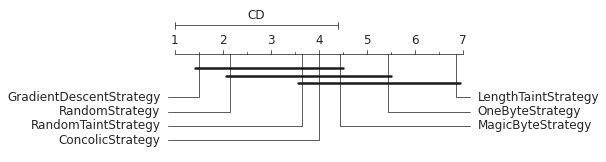

In [261]:
critical_difference = Orange.evaluation.compute_CD(average_ranks.values, len(programs))
t = Orange.evaluation.graph_ranks(average_ranks.values, average_ranks.index, critical_difference)
fig = plt.gcf()
fig.savefig(OUTPUT_FOLDER+'cd_strategies.png',bbox_inches='tight')


### RandomStrategy only with taint for better comparison

In [295]:
from scipy.stats import friedmanchisquare
df_to_rank = df_copy.copy()
df_flipped_perc = pd.DataFrame()
for program in programs:
    percentage_flipped = {}
    for strategy in strategies:
        if strategy == 'RandomStrategy':
            df_program_strategy = df_to_rank[(df_to_rank['program'] == program) & (df_to_rank['Strategy'] == strategy) & (df_to_rank['nrOfOffsets'] > 0)]
        else :
            df_program_strategy = df_to_rank[(df_to_rank['program'] == program) & (df_to_rank['Strategy'] == strategy)]
        percentage_flipped[strategy] = len(df_program_strategy[(df_program_strategy['flipped'] == True)])/len(df_to_rank[(df_to_rank['program'] == program) & (df_to_rank['Strategy'] == strategy)])
    percentage_flipped['program'] = program
    df_flipped_perc = df_flipped_perc.append(percentage_flipped, ignore_index=True)
print(df_flipped_perc)
pivot_ranked = df_flipped_perc.rank(axis='columns', ascending=False)
print(pivot_ranked)
average_ranks = pivot_ranked.mean().sort_values()
average_ranks.rename('average rank')
friedmanchisquare(
    df_flipped_perc['ConcolicStrategy'], 
    df_flipped_perc['GradientDescentStrategy'], 
    df_flipped_perc['LengthTaintStrategy'], 
    df_flipped_perc['MagicByteStrategy'], 
    df_flipped_perc['OneByteStrategy'],
    df_flipped_perc['RandomTaintStrategy'],
    df_flipped_perc['RandomStrategy'])

   ConcolicStrategy  GradientDescentStrategy  LengthTaintStrategy  \
0          0.372000                 0.410000             0.016000   
1          0.202983                 0.243933             0.009100   
2          0.026179                 0.468942             0.002922   
3          0.359036                 0.342169             0.055422   
4          0.135693                 0.779744             0.000000   
5          0.000000                 0.355568             0.054232   
6          0.354112                 0.548680             0.000605   

   MagicByteStrategy  OneByteStrategy  RandomStrategy  RandomTaintStrategy  \
0           0.370000         0.378000        0.276000             0.410000   
1           0.216127         0.130182        0.176694             0.176441   
2           0.194472         0.009057        0.199381             0.191317   
3           0.284337         0.130120        0.248193             0.274699   
4           0.069813         0.052114        0.573255    

FriedmanchisquareResult(statistic=27.452685421994882, pvalue=0.00011909208887974324)

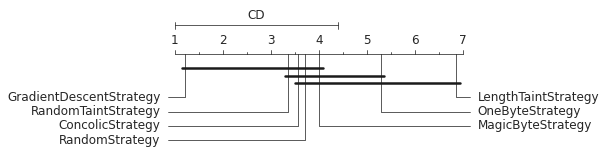

In [298]:
critical_difference = Orange.evaluation.compute_CD(average_ranks.values, len(programs))
t = Orange.evaluation.graph_ranks(average_ranks.values, average_ranks.index, critical_difference)
fig = plt.gcf()
fig.savefig(OUTPUT_FOLDER+'cd_strategies_with_offset.png',bbox_inches='tight')


# Percentage matched between static and dynamic

In [127]:
matched_percentages = pd.DataFrame({program: [len(df[(df['program'] == program) & (df['oviedo'] != '-')])*100/len(df[(df['program'] == program)])] for program in programs})
matched_percentages

,gif2png,file,nm,djpeg,jhead,xmlwf,tcpdump
0,87.565674,92.994828,85.509419,81.213307,96.949476,80.798992,83.781214


In [284]:
with open(OUTPUT_FOLDER+'tables/percentage_matched.tex', 'w') as output_file:
    tex = matched_percentages.applymap(lambda x: round(x,2)).transpose().reset_index().to_latex(header=['Binary', 'Percentage matched'], index=False)
    output_file.write(tex)